In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import datetime
import math
import calendar


# Read the  Train data

In [2]:
train = pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
train.shape

(1017209, 9)

In [4]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
train.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

# Read the Test data

In [7]:
test = pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\test.csv")
test.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  17-09-2015   1.0      1            0              0
1   2      3          4  17-09-2015   1.0      1            0              0
2   3      7          4  17-09-2015   1.0      1            0              0
3   4      8          4  17-09-2015   1.0      1            0              0
4   5      9          4  17-09-2015   1.0      1            0              0

In [8]:
test.shape

(41088, 8)

In [9]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
test.describe()

Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.489035   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%    10272.750000    279.750000      2.000000      1.000000      0.000000   
50%    20544.500000    553.500000      4.000000      1.000000      0.000000   
75%    30816.250000    832.250000      6.000000      1.000000      1.000000   
max    41088.000000   1115.000000      7.000000      1.000000      1.000000   

       SchoolHoliday  
count   41088.000000  
mean        0.443487  
std         0.496802  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


# Read the store Data

In [12]:
store = pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Store.csv")
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [13]:
store.shape

(1115, 10)

In [14]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [16]:
store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [17]:
train.shape, test.shape, store.shape

((1017209, 9), (41088, 8), (1115, 10))

In [18]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [19]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 11)

Convert all categorical columns to object across the three datasets



In [20]:
# helper function we are going to use to convert all categorical columns to object across the given datasets
def convert_cat_cols_obj(dataset, col_lst):
    
    for i in col_lst: 
        
        dataset = dataset.astype({i:'object'})
        
    return dataset

In [21]:
## Converting categorical columns in train set into object

train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']

train_data = convert_cat_cols_obj(train, train_cols)

In [22]:
## Converting categorical columns in train set into object

test_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']

test_data = convert_cat_cols_obj(test, test_cols)

In [23]:
## Converting categorical columns in store set into object

store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']

store_data = convert_cat_cols_obj(store, store_cols)

In [24]:
## Dealing with cardinality

train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)

test_data['StateHoliday'].replace({'0':'o'},inplace=True)

1. Understanding the data


In [25]:

train_data.head()

Store DayOfWeek        Date  Sales  Customers Open Promo StateHoliday  \
0      1         5  31-07-2015   5263        555    1     1            o   
1      2         5  31-07-2015   6064        625    1     1            o   
2      3         5  31-07-2015   8314        821    1     1            o   
3      4         5  31-07-2015  13995       1498    1     1            o   
4      5         5  31-07-2015   4822        559    1     1            o   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1

In [26]:
test_data.head()

Id  Store DayOfWeek        Date Open Promo StateHoliday SchoolHoliday
0   1      1         4  17-09-2015  1.0     1            o             0
1   2      3         4  17-09-2015  1.0     1            o             0
2   3      7         4  17-09-2015  1.0     1            o             0
3   4      8         4  17-09-2015  1.0     1            o             0
4   5      9         4  17-09-2015  1.0     1            o             0

In [27]:
store_data.head()

Store StoreType Assortment  CompetitionDistance CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                       9.0   
1      2         a          a                570.0                      11.0   
2      3         a          a              14130.0                      12.0   
3      4         c          c                620.0                       9.0   
4      5         a          a              29910.0                       4.0   

   CompetitionOpenSinceYear Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0      0              NaN              NaN   
1                    2007.0      1             13.0           2010.0   
2                    2006.0      1             14.0           2011.0   
3                    2009.0      0              NaN              NaN   
4                    2015.0      0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [28]:
store_data.describe() # showing only the integer object description

Store  CompetitionDistance  CompetitionOpenSinceYear  \
count  1115.00000          1112.000000                761.000000   
mean    558.00000          5404.901079               2008.668857   
std     322.01708          7663.174720                  6.195983   
min       1.00000            20.000000               1900.000000   
25%     279.50000           717.500000               2006.000000   
50%     558.00000          2325.000000               2010.000000   
75%     836.50000          6882.500000               2013.000000   
max    1115.00000         75860.000000               2015.000000   

       Promo2SinceWeek  Promo2SinceYear  
count       571.000000       571.000000  
mean         23.595447      2011.763573  
std          14.141984         1.674935  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

In [29]:
train_data.describe() # showing only the integer object description

Store         Sales     Customers
count  1.017209e+06  1.017209e+06  1.017209e+06
mean   5.584297e+02  5.773819e+03  6.331459e+02
std    3.219087e+02  3.849926e+03  4.644117e+02
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    2.800000e+02  3.727000e+03  4.050000e+02
50%    5.580000e+02  5.744000e+03  6.090000e+02
75%    8.380000e+02  7.856000e+03  8.370000e+02
max    1.115000e+03  4.155100e+04  7.388000e+03

In [30]:
test_data.describe() # showing only the integer object description

Id         Store
count  41088.000000  41088.000000
mean   20544.500000    555.899533
std    11861.228267    320.274496
min        1.000000      1.000000
25%    10272.750000    279.750000
50%    20544.500000    553.500000
75%    30816.250000    832.250000
max    41088.000000   1115.000000

In [31]:
train_data.shape,test_data.shape,store_data.shape

((1017209, 9), (41088, 8), (1115, 10))

In [32]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 

# that are present in both train and store sets are merged together

train_store = pd.merge(train, store, how = 'inner', on = 'Store')


print("In total: ", train_store.shape)

train_store.head()

Joining train set with an additional store information.
In total:  (1017209, 18)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

# Task 1 - Exploration of customer purchasing behaviour.



# 1.Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


In [33]:
time_series_train = train_data[['Date','Sales']]
time_series_train.head()

Date  Sales
0  31-07-2015   5263
1  31-07-2015   6064
2  31-07-2015   8314
3  31-07-2015  13995
4  31-07-2015   4822

In [34]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])

time_series_train = time_series_train.set_index('datetime')

time_series_train.drop(['Date'], axis=1, inplace=True)

time_series_train.head()

Sales
datetime         
2015-07-31   5263
2015-07-31   6064
2015-07-31   8314
2015-07-31  13995
2015-07-31   4822

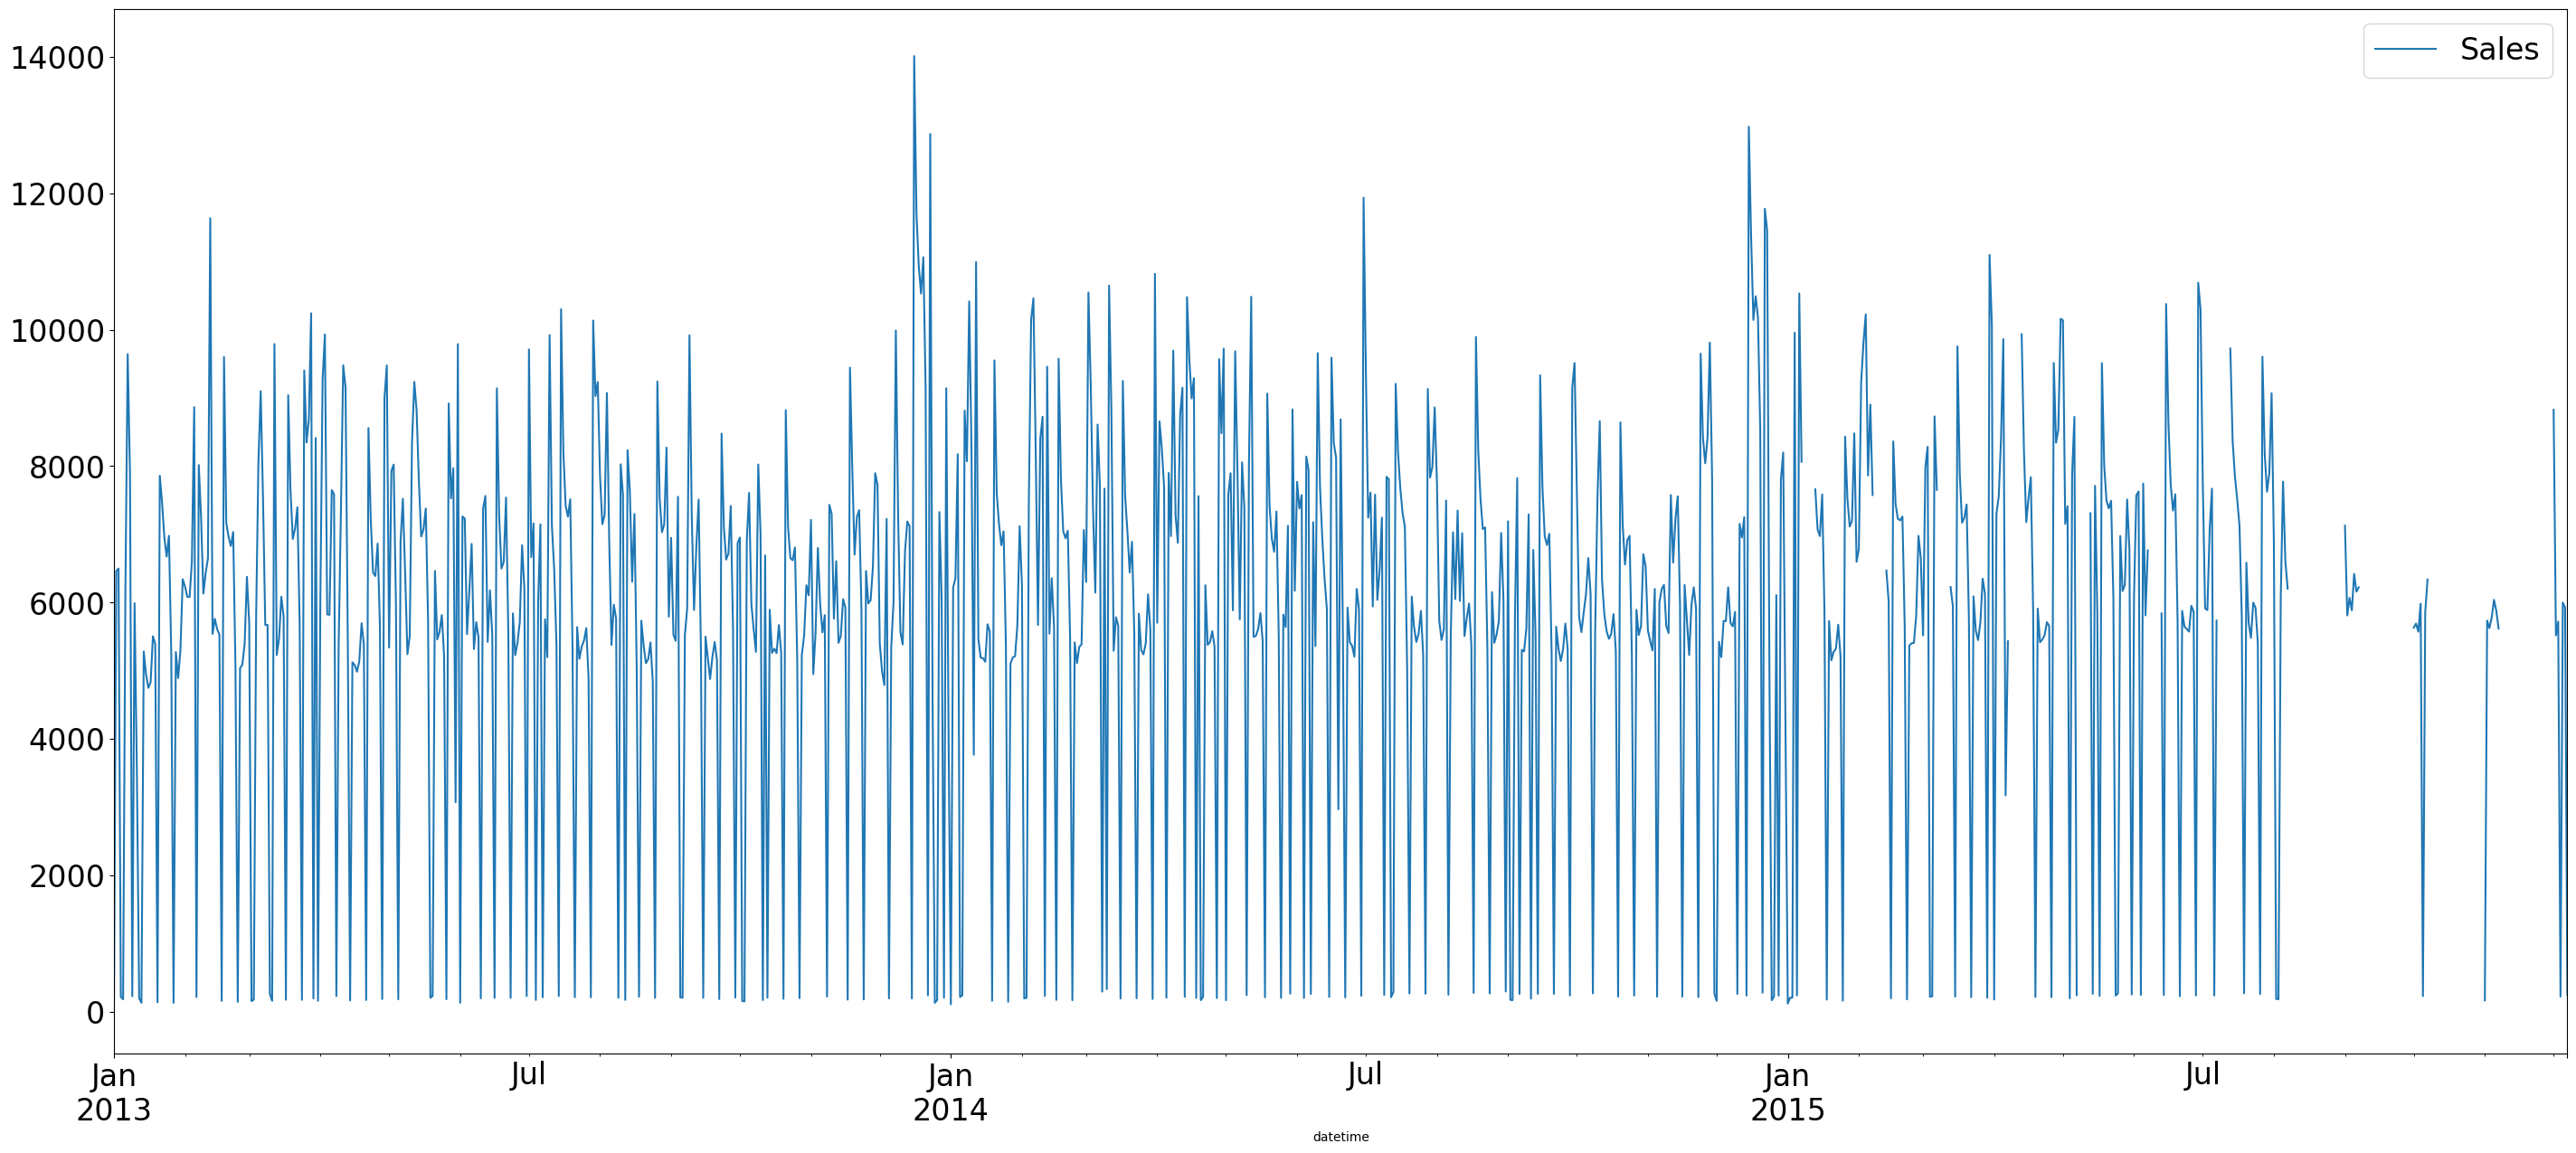

In [35]:
time_series_train_day = time_series_train.resample('D').mean()

time_series_train_day.plot(figsize=(35,15), fontsize=24)

plt.legend(fontsize=24)

plt.show()

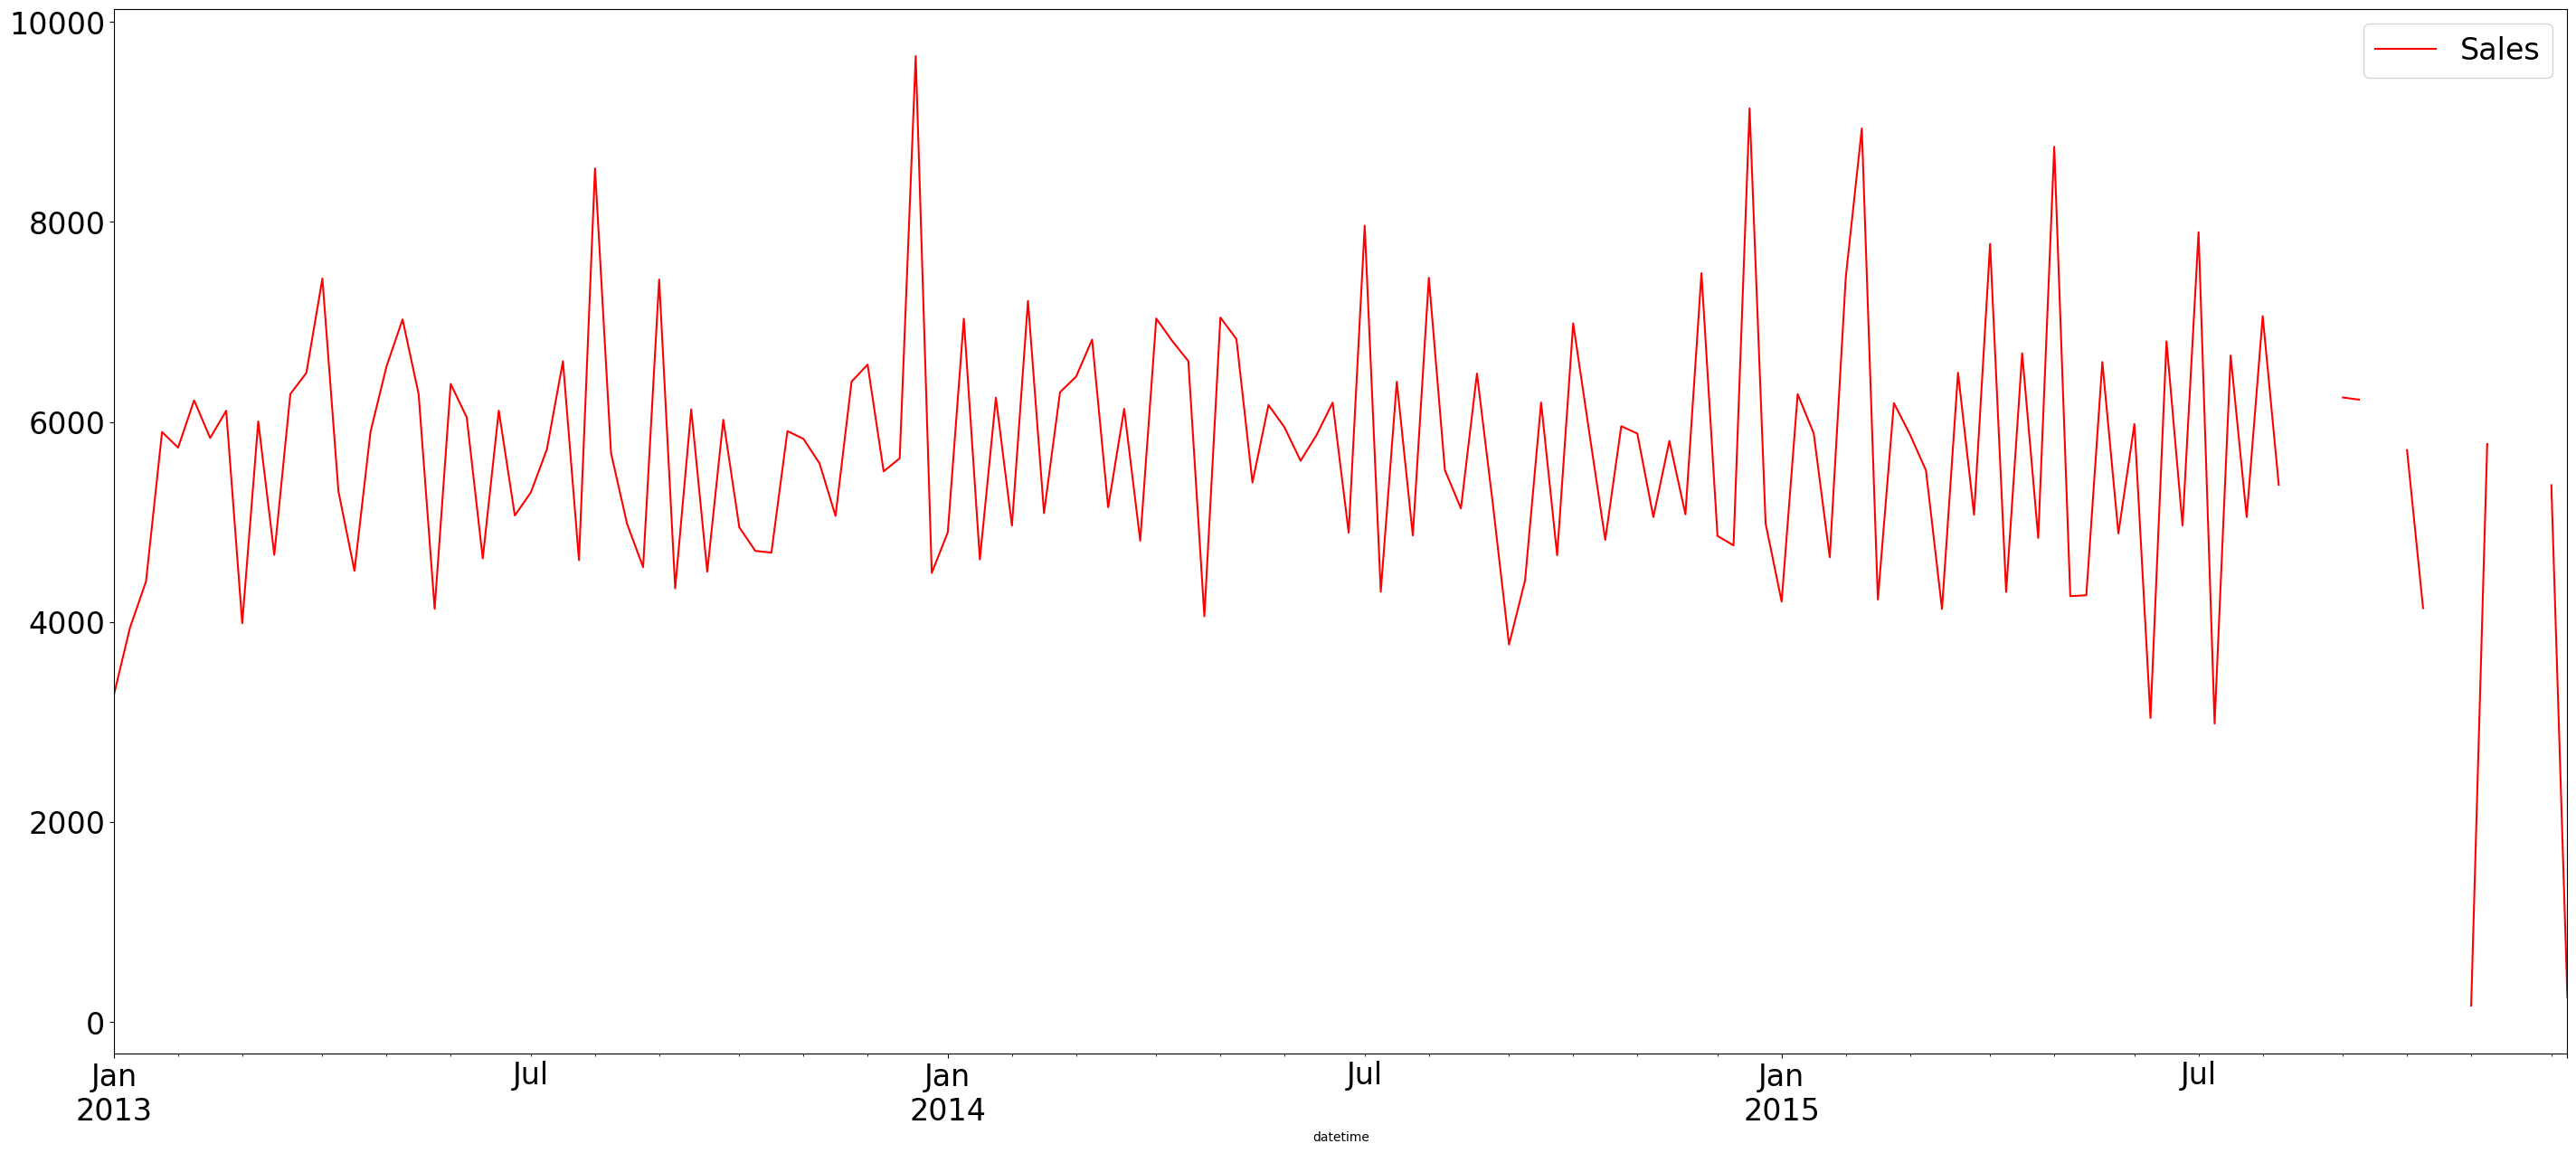

In [36]:
time_series_train_week = time_series_train.resample('W').mean()

time_series_train_week.plot(figsize=(35,15), fontsize=24,color='red')

plt.legend(fontsize=24)

plt.show()

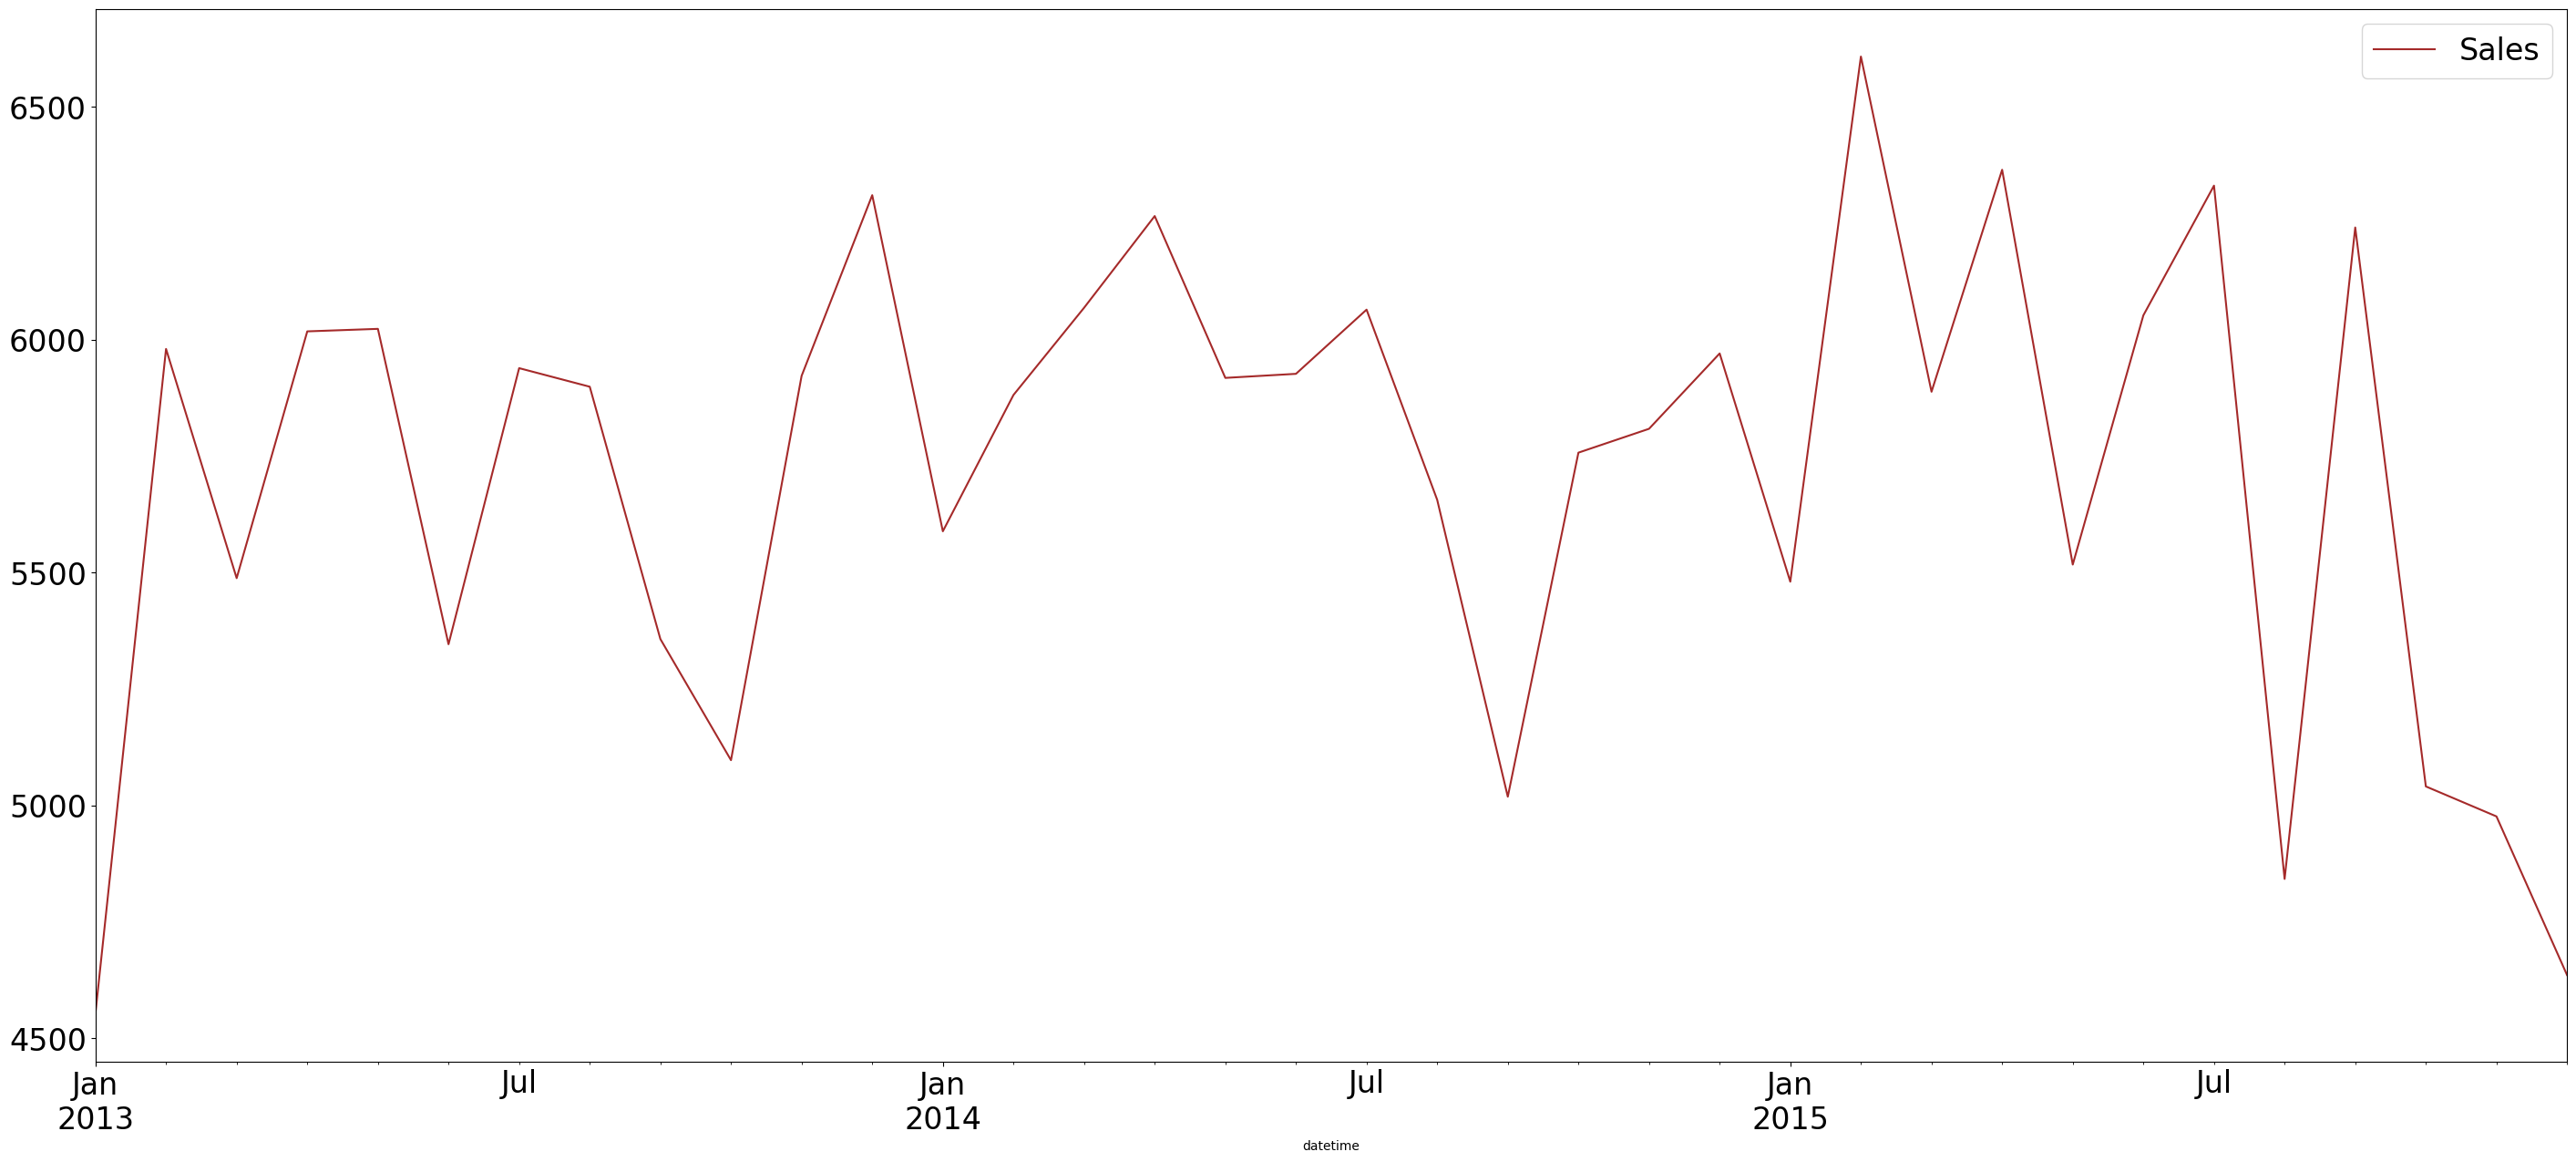

In [37]:
time_series_train_month = time_series_train.resample('M').mean()

time_series_train_month.plot(figsize=(35,15), fontsize=24,color ='brown')

plt.legend(fontsize=24
          )
plt.show()

Similarity check of data series for test dataset


In [38]:
test_data.head()

Id  Store DayOfWeek        Date Open Promo StateHoliday SchoolHoliday
0   1      1         4  17-09-2015  1.0     1            o             0
1   2      3         4  17-09-2015  1.0     1            o             0
2   3      7         4  17-09-2015  1.0     1            o             0
3   4      8         4  17-09-2015  1.0     1            o             0
4   5      9         4  17-09-2015  1.0     1            o             0

Note:
I couldn't say anything about the similarity of the train and test datasets since the I can't see the Sales column

in test and can't analyse the seasonality in test dataset 

from three graphs above we can see that the sales is peak on december 2013 and december 2014, for the reason that 

holidays are on december but as data scietist lets make it reasonable and data driven.

# 2.Check & compare sales behavior before, during and after holidays.


In [39]:
# lets extract the dataset for Chrismas holiday from train data

chrismas_data = train_data[train_data['StateHoliday'] == "c"]

chrismas_data

Store DayOfWeek        Date  Sales  Customers Open Promo StateHoliday  \
241055      1         5  26-12-2014      0          0    0     0            c   
241056      2         5  26-12-2014      0          0    0     0            c   
241057      3         5  26-12-2014      0          0    0     0            c   
241058      4         5  26-12-2014      0          0    0     0            c   
241059      5         5  26-12-2014      0          0    0     0            c   
...       ...       ...         ...    ...        ...  ...   ...          ...   
618035   1111         3  25-12-2013      0          0    0     0            c   
618036   1112         3  25-12-2013      0          0    0     0            c   
618037   1113         3  25-12-2013      0          0    0     0            c   
618038   1114         3  25-12-2013      0          0    0     0            c   
618039   1115         3  25-12-2013      0          0    0     0            c   

       SchoolHoliday  
241055             1  
241056             1  
241057             1  
241058             1  
241059             1  
...              ...  
618035             1  
618036             1  
618037             1  
618038             1  
618039             1  

[4100 rows x 9 columns]

In [40]:
chrismas_data.shape

(4100, 9)

Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [41]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [42]:
christmas_data = train_store[(train_store['DayOfWeek'] == 7) |(train_store['DayOfWeek'] == 1)]

christmas_data.shape

(289460, 18)

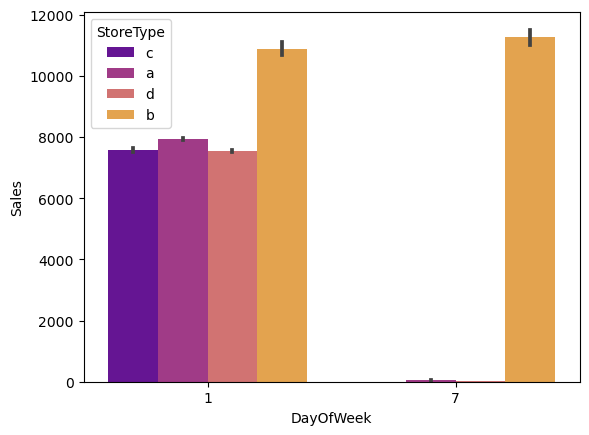

In [43]:
# sales trends
ax = sns.barplot(data = christmas_data, x = 'DayOfWeek', y = "Sales", 
                # per store type in cols
               palette = 'plasma',
                   
               hue = 'StoreType',
                   
                # per promo in the store in rows
               color = 'r') 

# 3.What can you say about the correlation between sales and number of customers?

In [44]:
data_corr = train_store[['Store','Sales','Customers',]]

<Axes: >

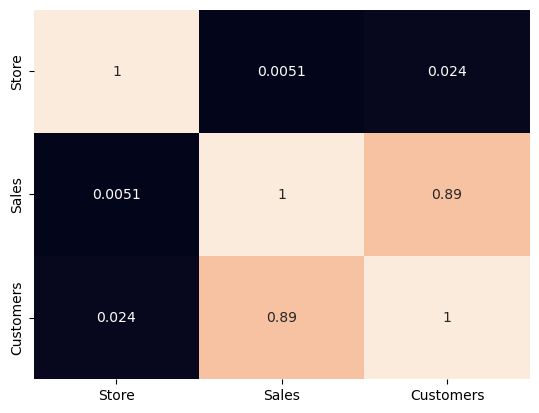

In [45]:
#correlation matrix

correlation = data_corr.corr()

sns.heatmap(correlation,annot = True,  cbar=False)

# Note: as we can see from the above figure there is strong correlation between sales and number of customer whith correllation of 0.89.

# 4.How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [46]:
train_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [47]:
promo_sales = train_store[['Store','Promo','Promo2','Sales',"Customers"]]
promo_sales.head()

Store  Promo  Promo2  Sales  Customers
0      1      1       0   5263        555
1      1      1       0   5020        546
2      1      1       0   4782        523
3      1      1       0   5011        560
4      1      1       0   6102        612

In [48]:
promo_sales[promo_sales['Promo'] ==1].Customers.sum()

318263948

In [49]:
promo_sales_grouped = promo_sales.groupby(["Promo"])[['Sales','Customers']].sum()

promo_sales_grouped

Sales  Customers
Promo                       
0      2771974337  325777807
1      3101206286  318263948

In [50]:
sales0 = promo_sales_grouped.iloc[0,0]

sales1 = promo_sales_grouped.iloc[1,0]

cust0 = promo_sales_grouped.iloc[0,1]

cust1 = promo_sales_grouped.iloc[1,1]

In [51]:
percentage_change_sales = ((sales1 - sales0)/sales0) * 100

percentage_change_cust = ((cust1-cust0)/cust0) *100

print("Percentage increase in Sales is " + str(percentage_change_sales) + "%")

print("Percentage increase in Customer is " + str(percentage_change_cust) + "%")


Percentage increase in Sales is 11.877164395263302%
Percentage increase in Customer is -2.3064367303571416%


Text(0.5, 1.0, 'Promo vs Sales')

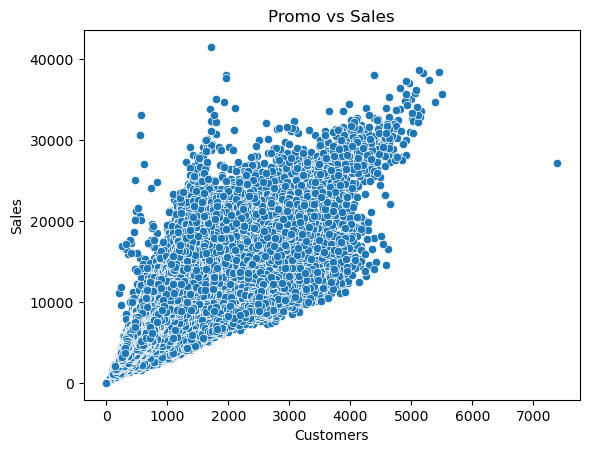

In [52]:
ax = sns.scatterplot(x='Customers', y="Sales",data=promo_sales )

ax.set_title('Promo vs Sales')

Text(0.5, 1.0, 'Promo vs Sales')

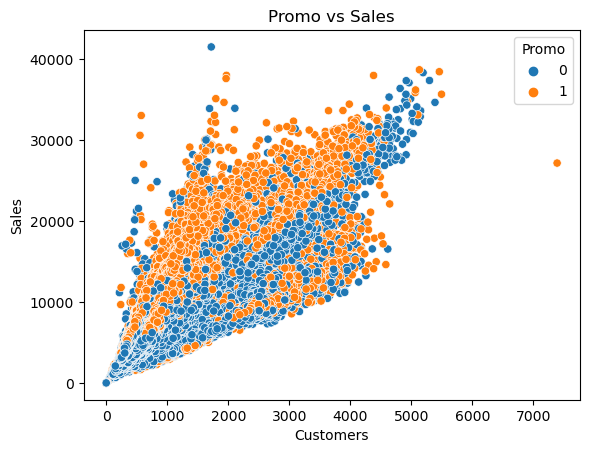

In [53]:
ax = sns.scatterplot(x='Customers', y="Sales",hue="Promo",data=promo_sales )

ax.set_title('Promo vs Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

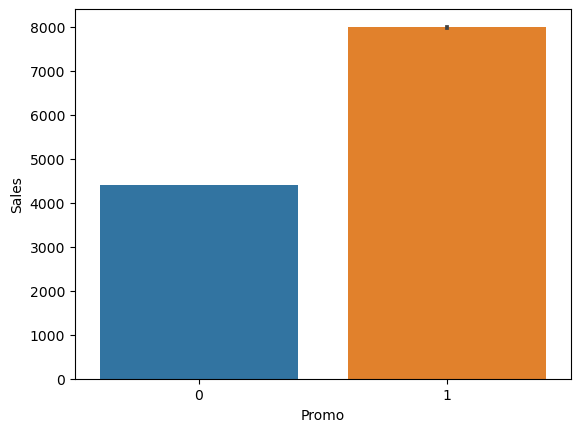

In [54]:
sns.barplot(x='Promo', y="Sales", data=promo_sales )

Note: there is 11.877% increase during promotion on sales and therefore Promo while there is decress of 2.3% in customer.

# 5.Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [55]:
promos_store = train_store[['Store','StoreType','Promo','Sales','Customers']]

In [56]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      341123  1466971549  180276608
          1      210504  1698363310  183264826
b         0        9784    92061910   18685985
          1        6046    67169485   12779636
c         0       84596   375186657   47222206
          1       52244   408034769   44907499
d         0      193626   837754221   79593008
          1      119286   927638722   77311987

Note: as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a 
    huge increasein Sales relative to the other stores.

# 6.Trends of customer behavior during store open and closing times.

In [57]:
# bringing in the data again for this question sake

train_before_cleaning = pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")

train_before_cleaning.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5          5  31-07-2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [58]:
train_before_cleaning[train_before_cleaning['Open'] == 0]

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
291        292          5  31-07-2015      0          0     0      1   
875        876          5  31-07-2015      0          0     0      1   
1406       292          4  30-07-2015      0          0     0      1   
1990       876          4  30-07-2015      0          0     0      1   
2521       292          3  29-07-2015      0          0     0      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  01-01-2013      0          0     0      0   
1017205   1112          2  01-01-2013      0          0     0      0   
1017206   1113          2  01-01-2013      0          0     0      0   
1017207   1114          2  01-01-2013      0          0     0      0   
1017208   1115          2  01-01-2013      0          0     0      0   

        StateHoliday  SchoolHoliday  
291                0              1  
875                0              1  
1406               0              1  
1990               0              1  
2521               0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[172817 rows x 9 columns]

In [59]:
data_open_state = train_before_cleaning[['Open','Customers']]

data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})

data_open_state

Customers
Open           
0             0
1     644041755

<Axes: xlabel='Open', ylabel='Customers'>

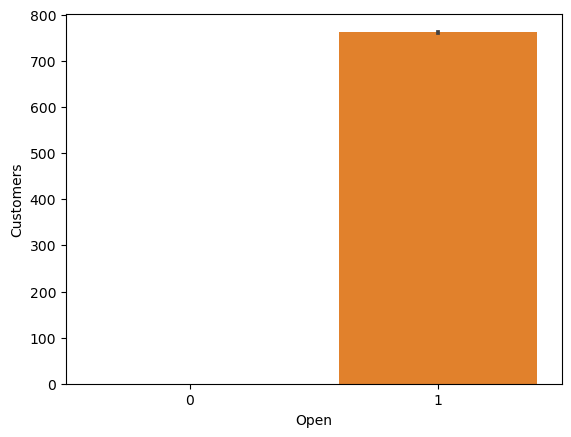

In [60]:
sns.barplot(x="Open",y='Customers', data=train_before_cleaning)

Note: from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts
      with the pharmaceutical when it is opened.

# 7.Which stores are opened on all weekdays? How does that affect their sales on weekends? 


In [61]:
train_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [62]:
weekday_data = train_store[['Open', "DayOfWeek","StoreType",'Sales']]

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

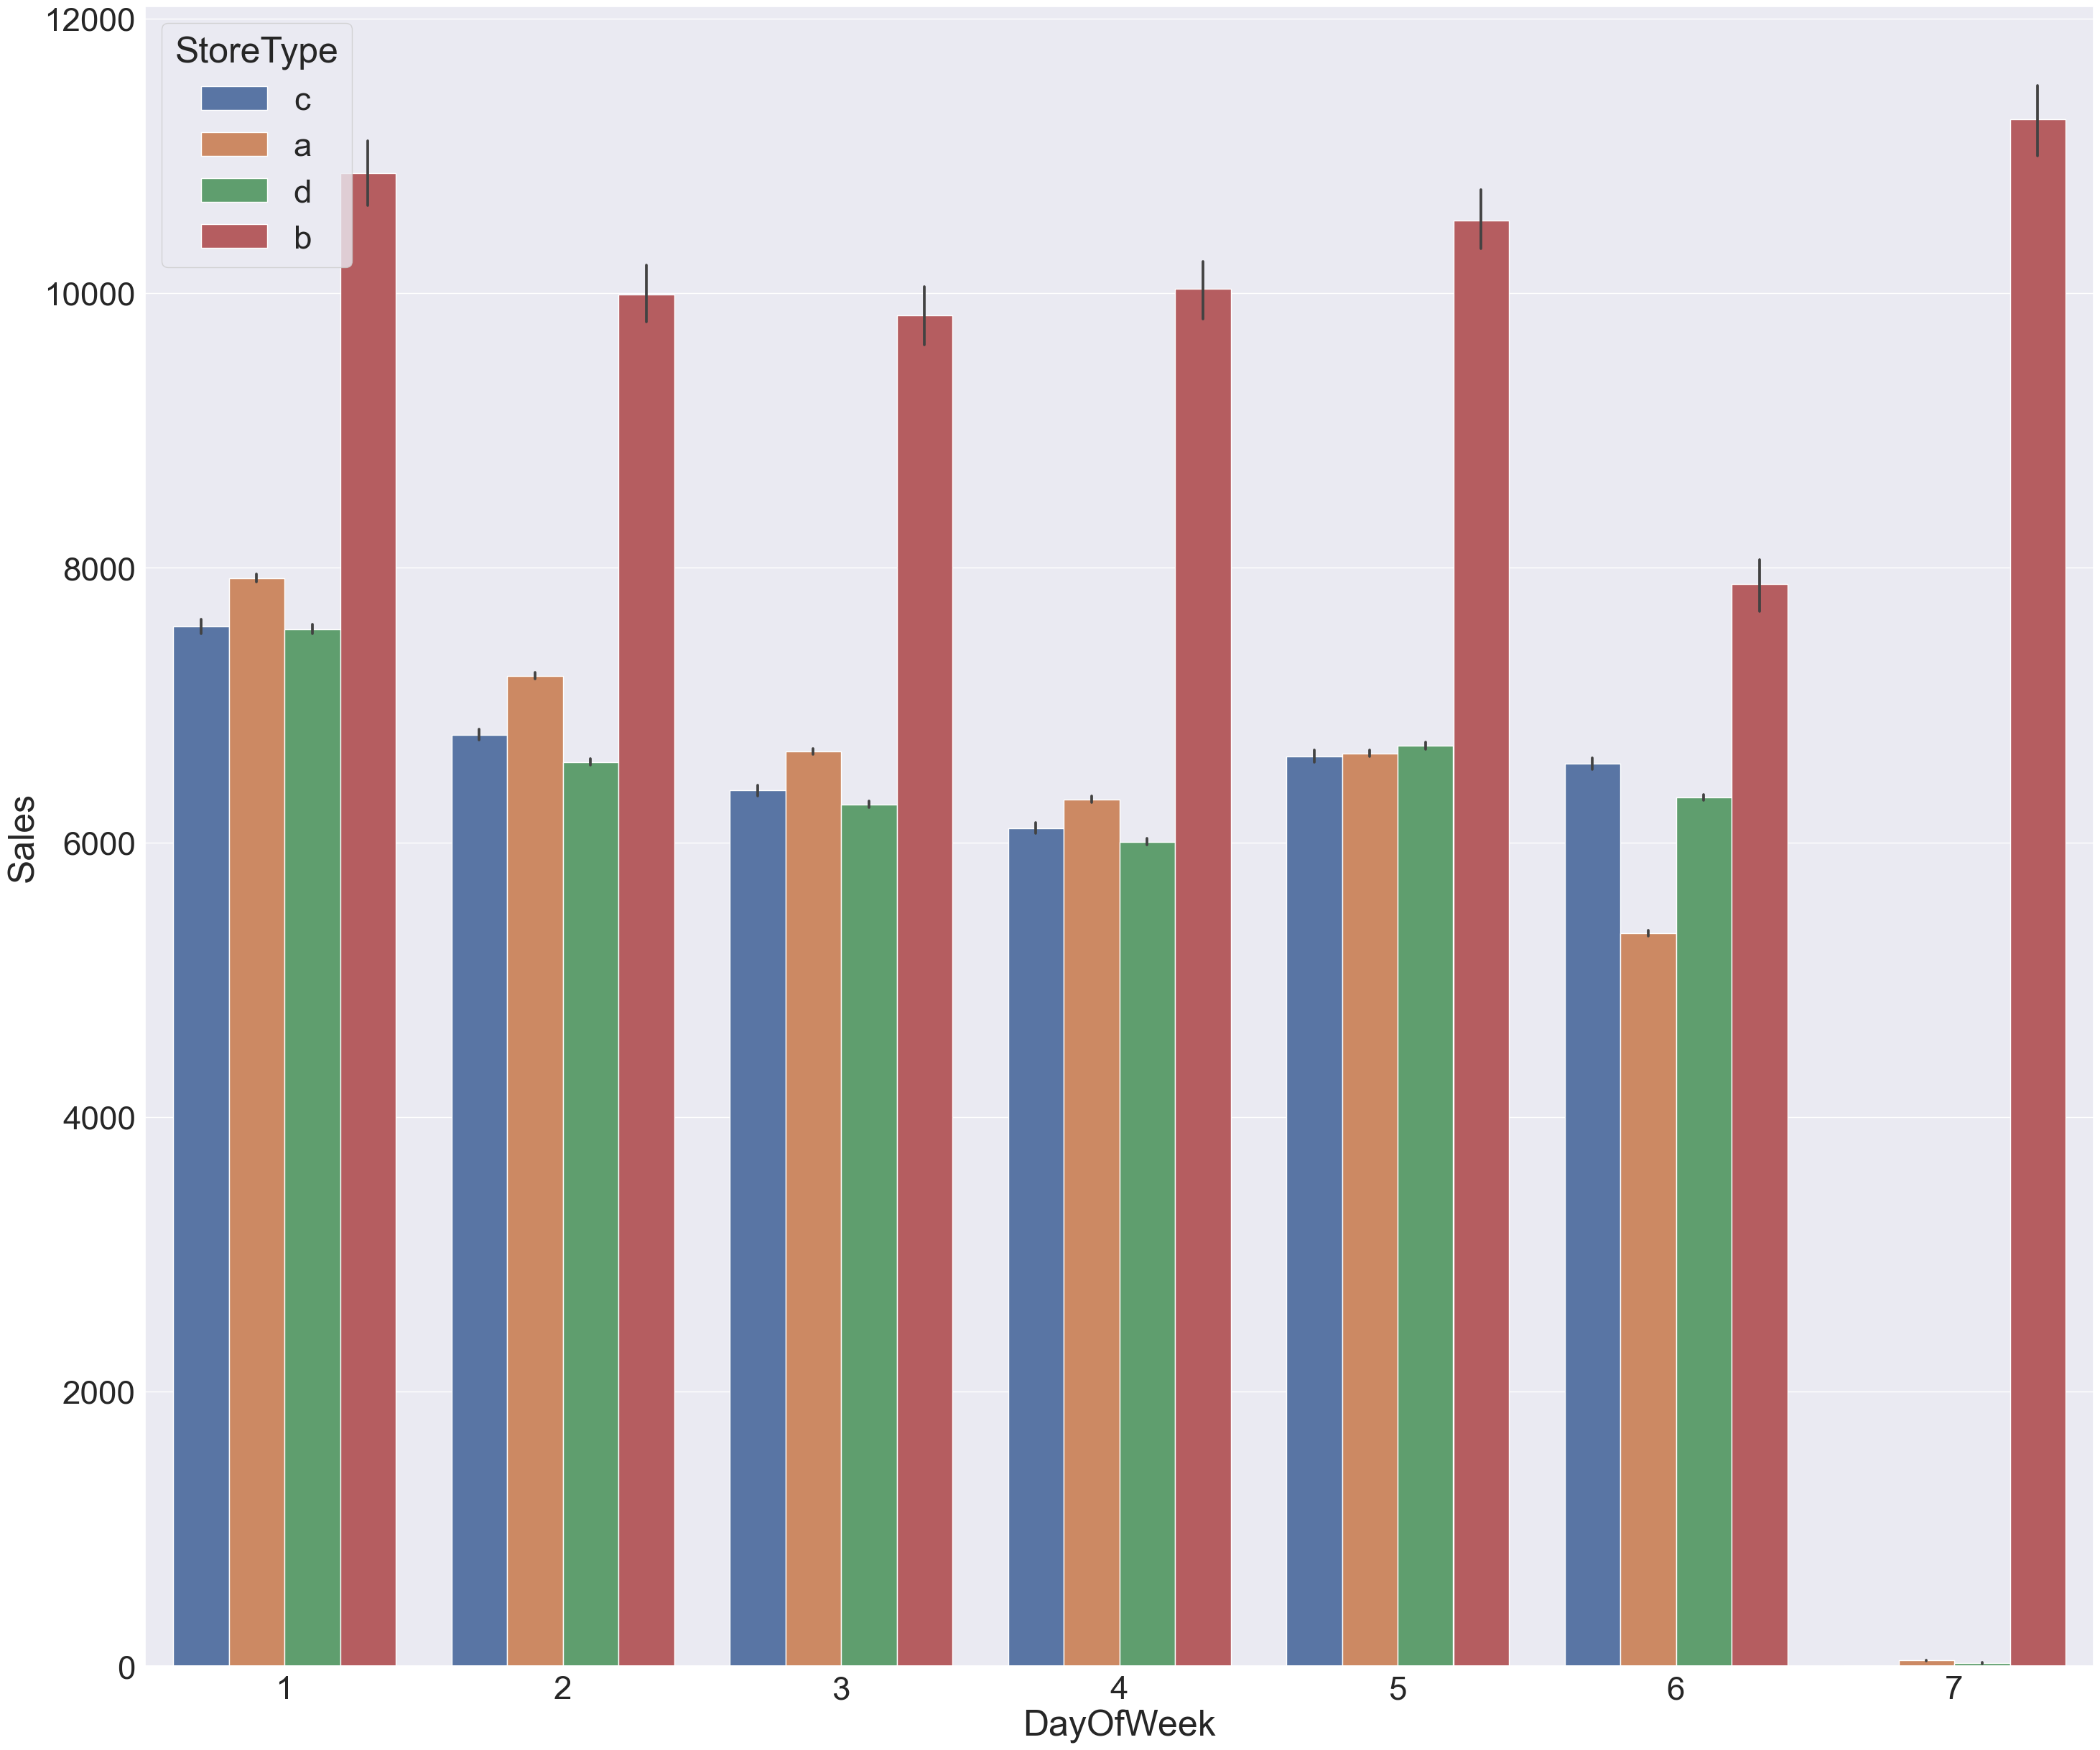

In [63]:
sns.set(font_scale=3) 

plt.figure(figsize=(35,30))

sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

Note: from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen
    on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as shown in the figure below.

In [64]:
weekday_data1 = train_store.groupby(['StoreType']).agg({"DayOfWeek":"count","Sales":'sum'})

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

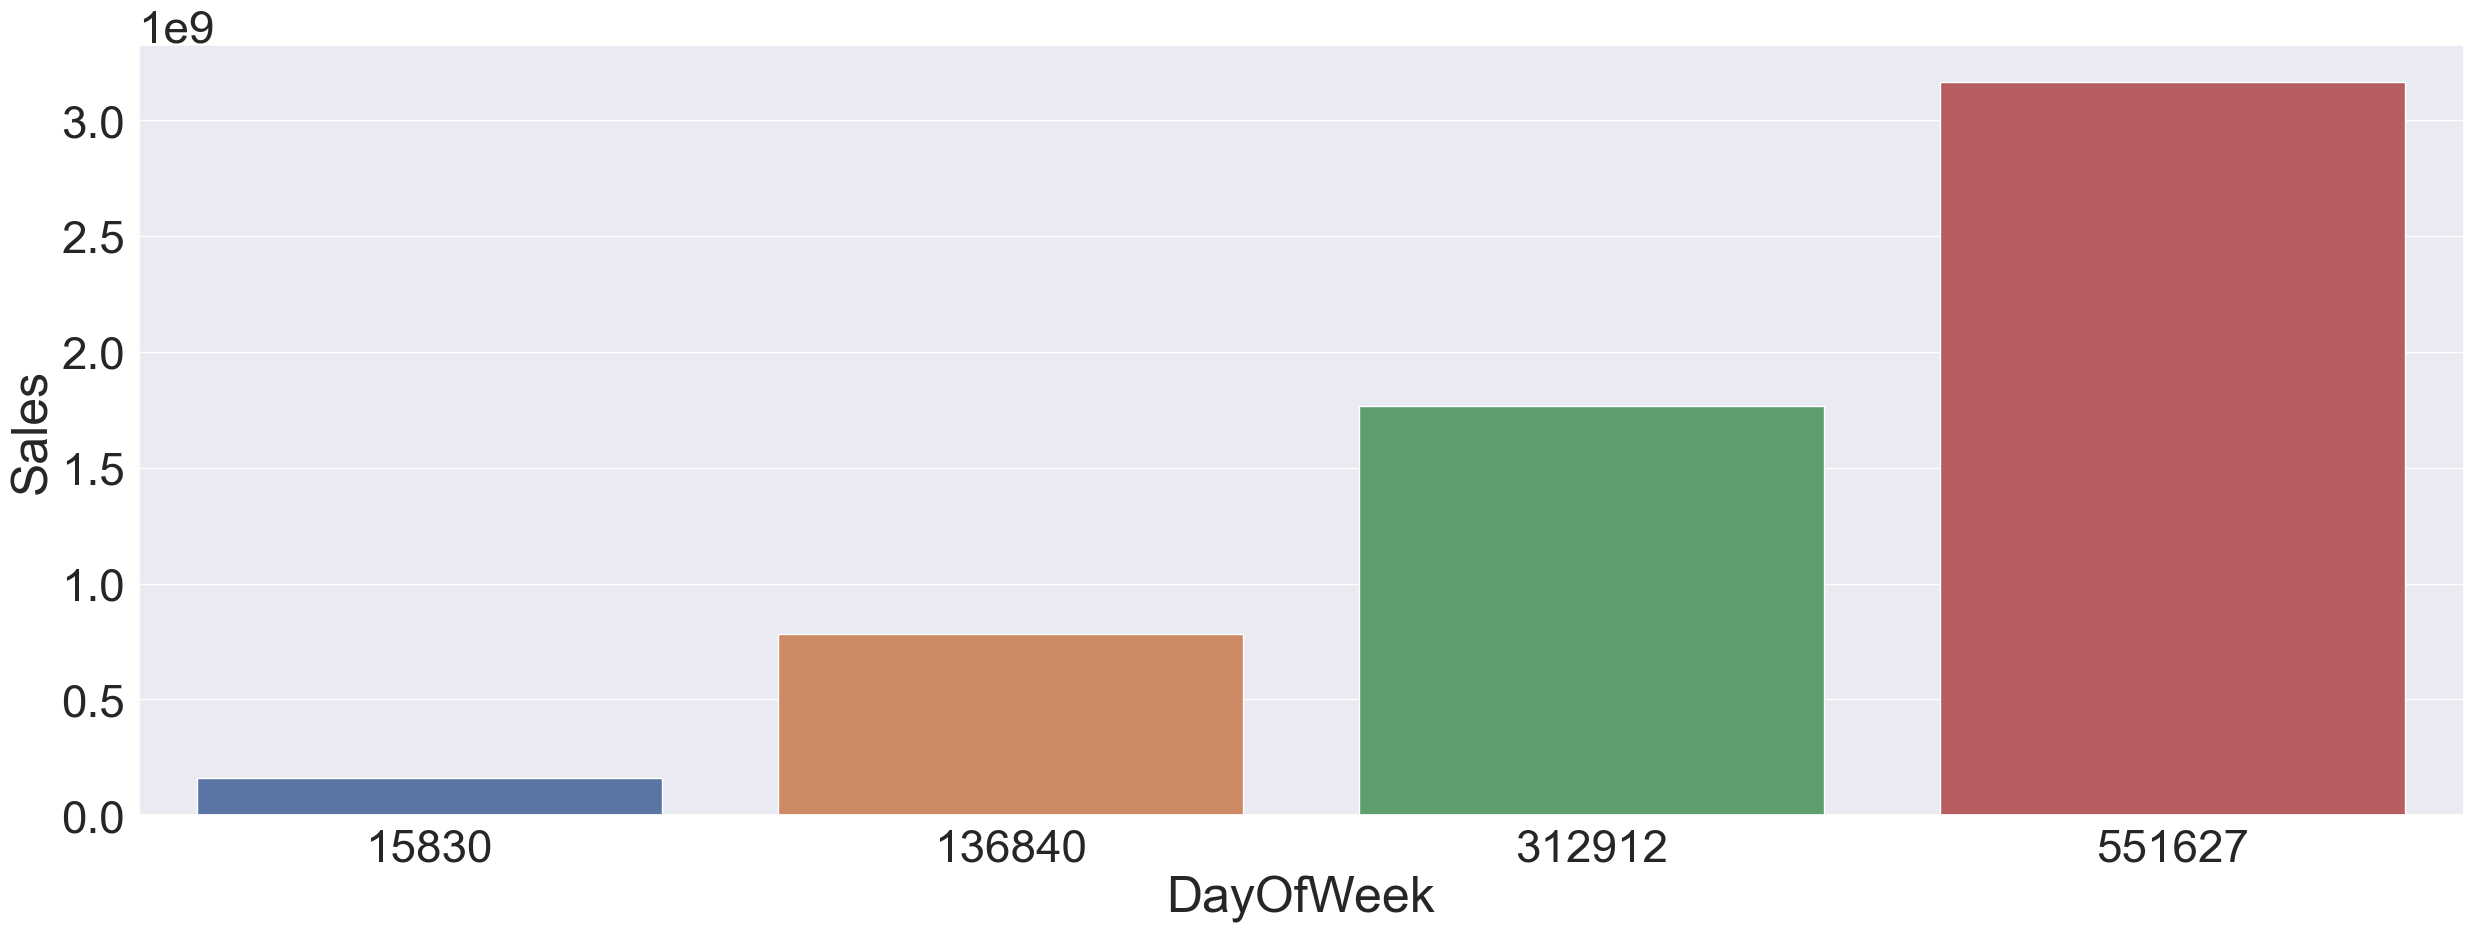

In [65]:
plt.figure(figsize=(30,10))

sns.barplot(x="DayOfWeek", y="Sales", data=weekday_data1)

# 8.Check how the assortment type affects sales.

In [66]:
# extractng Assortment data to be used for this analysis

assort_data = train_store[['Assortment','Sales']]

In [67]:
assort_data.nunique()

Assortment        3
Sales         21734
dtype: int64

<Axes: xlabel='Assortment', ylabel='Sales'>

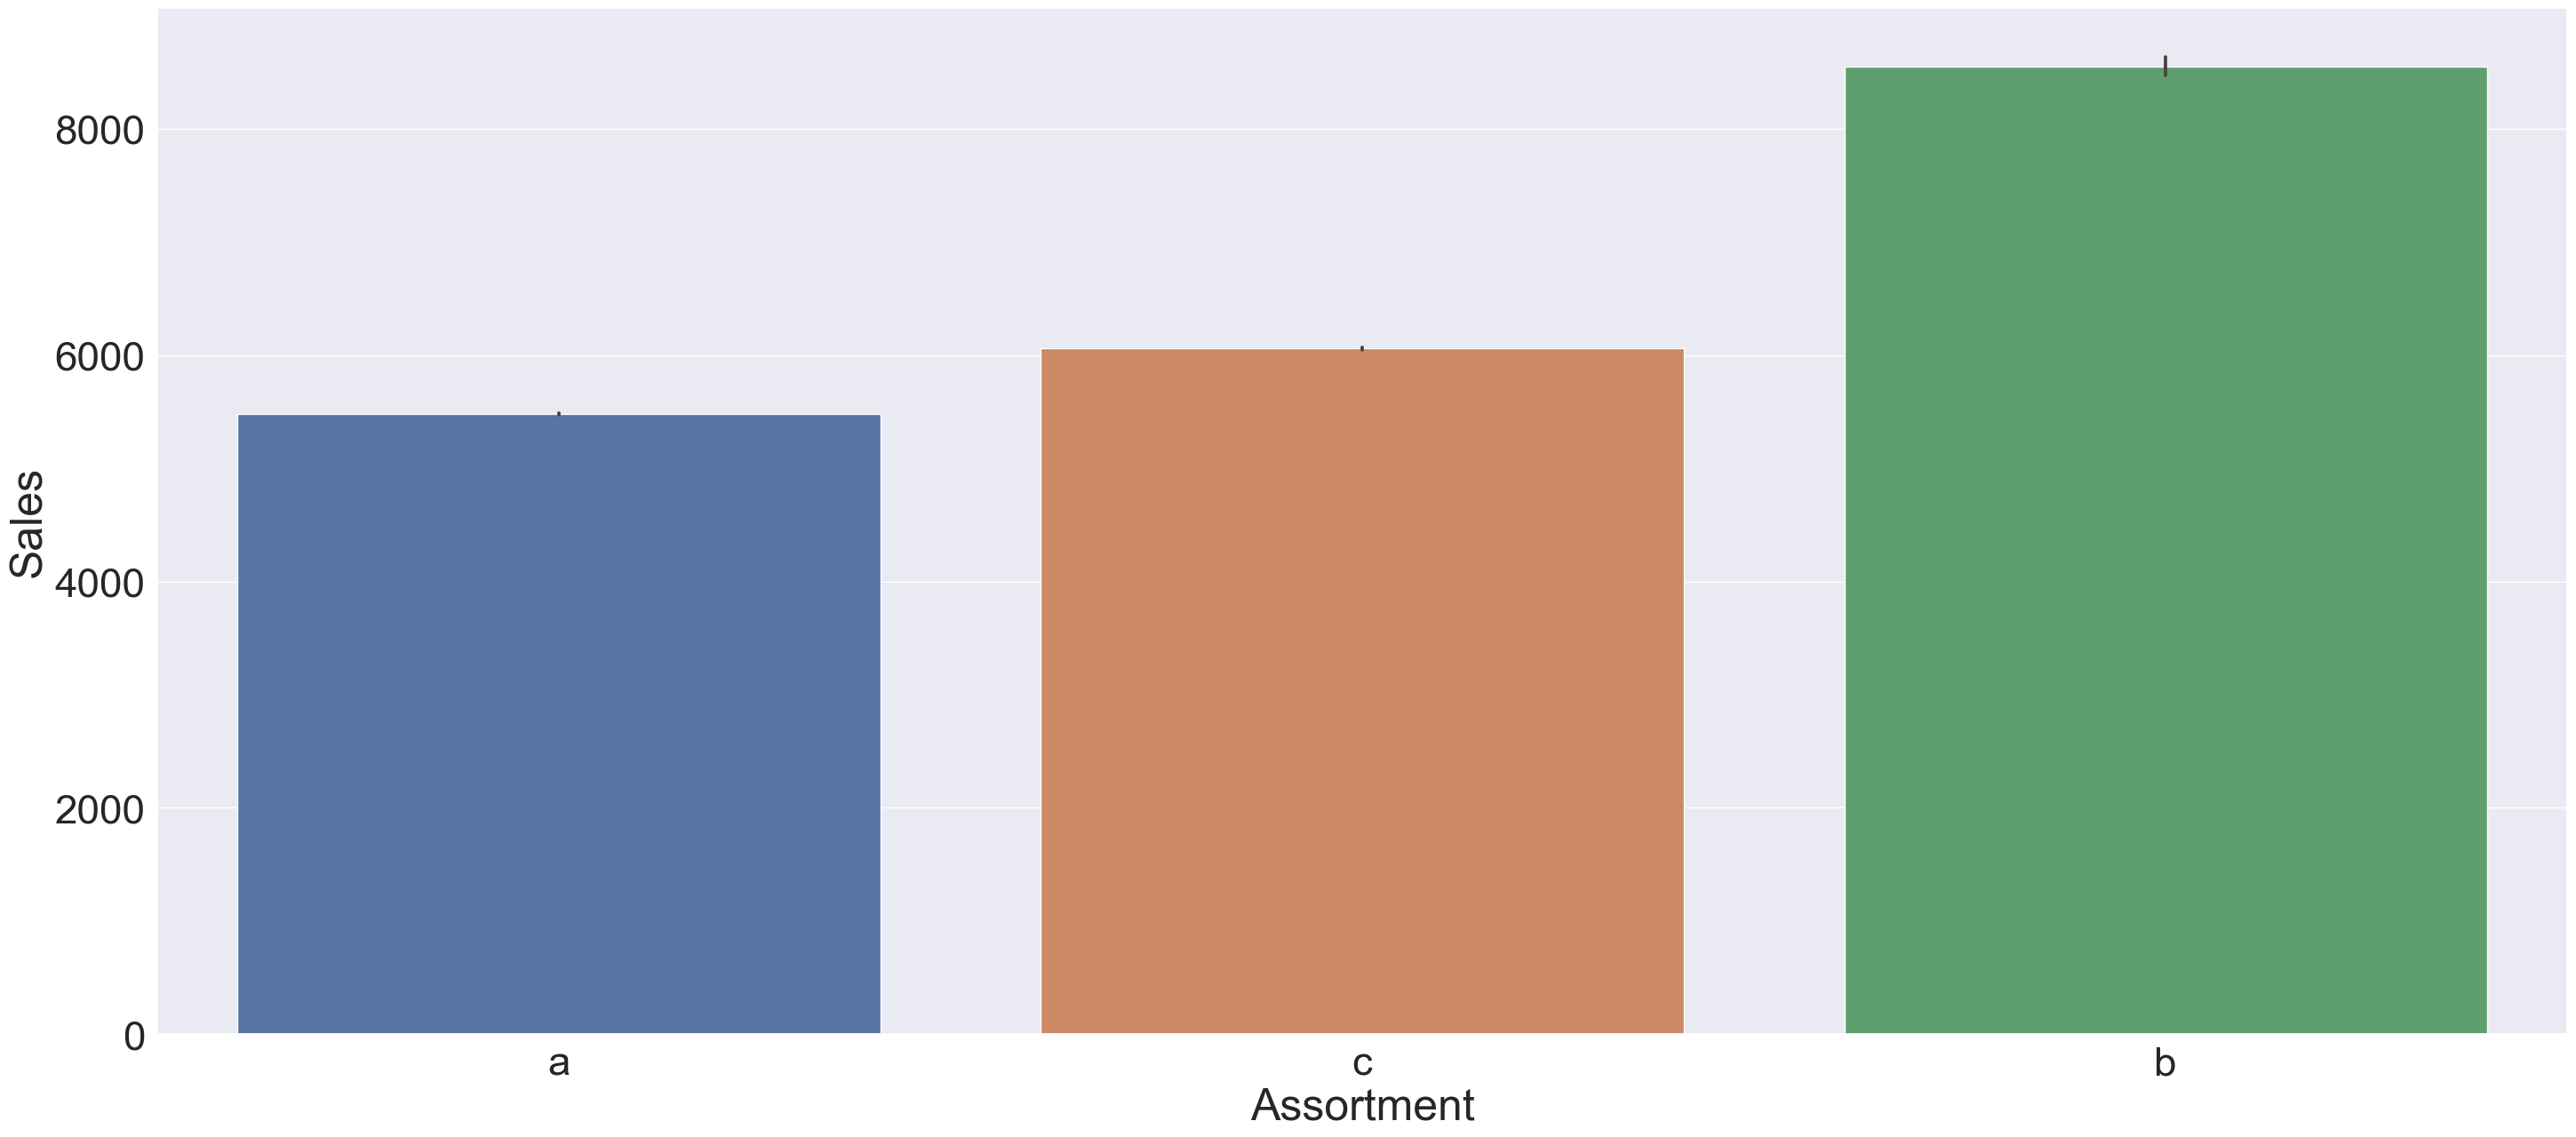

In [68]:
# visulazing the above data we use bar plot this Assortment is categorical

plt.figure(figsize=(35,15))

sns.barplot(x="Assortment", y="Sales", data=assort_data)

Note: Check how the assortment type affects sales i don't understand.

In [69]:
train_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

# 9.How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city 
centres, does the distance matter in that case?



In [70]:
distance_data = train_store[['CompetitionDistance','Sales']]

distance_data = distance_data.groupby(['CompetitionDistance']).agg({"Sales":"sum"})

distance_data.max()

Sales    76259307
dtype: int64

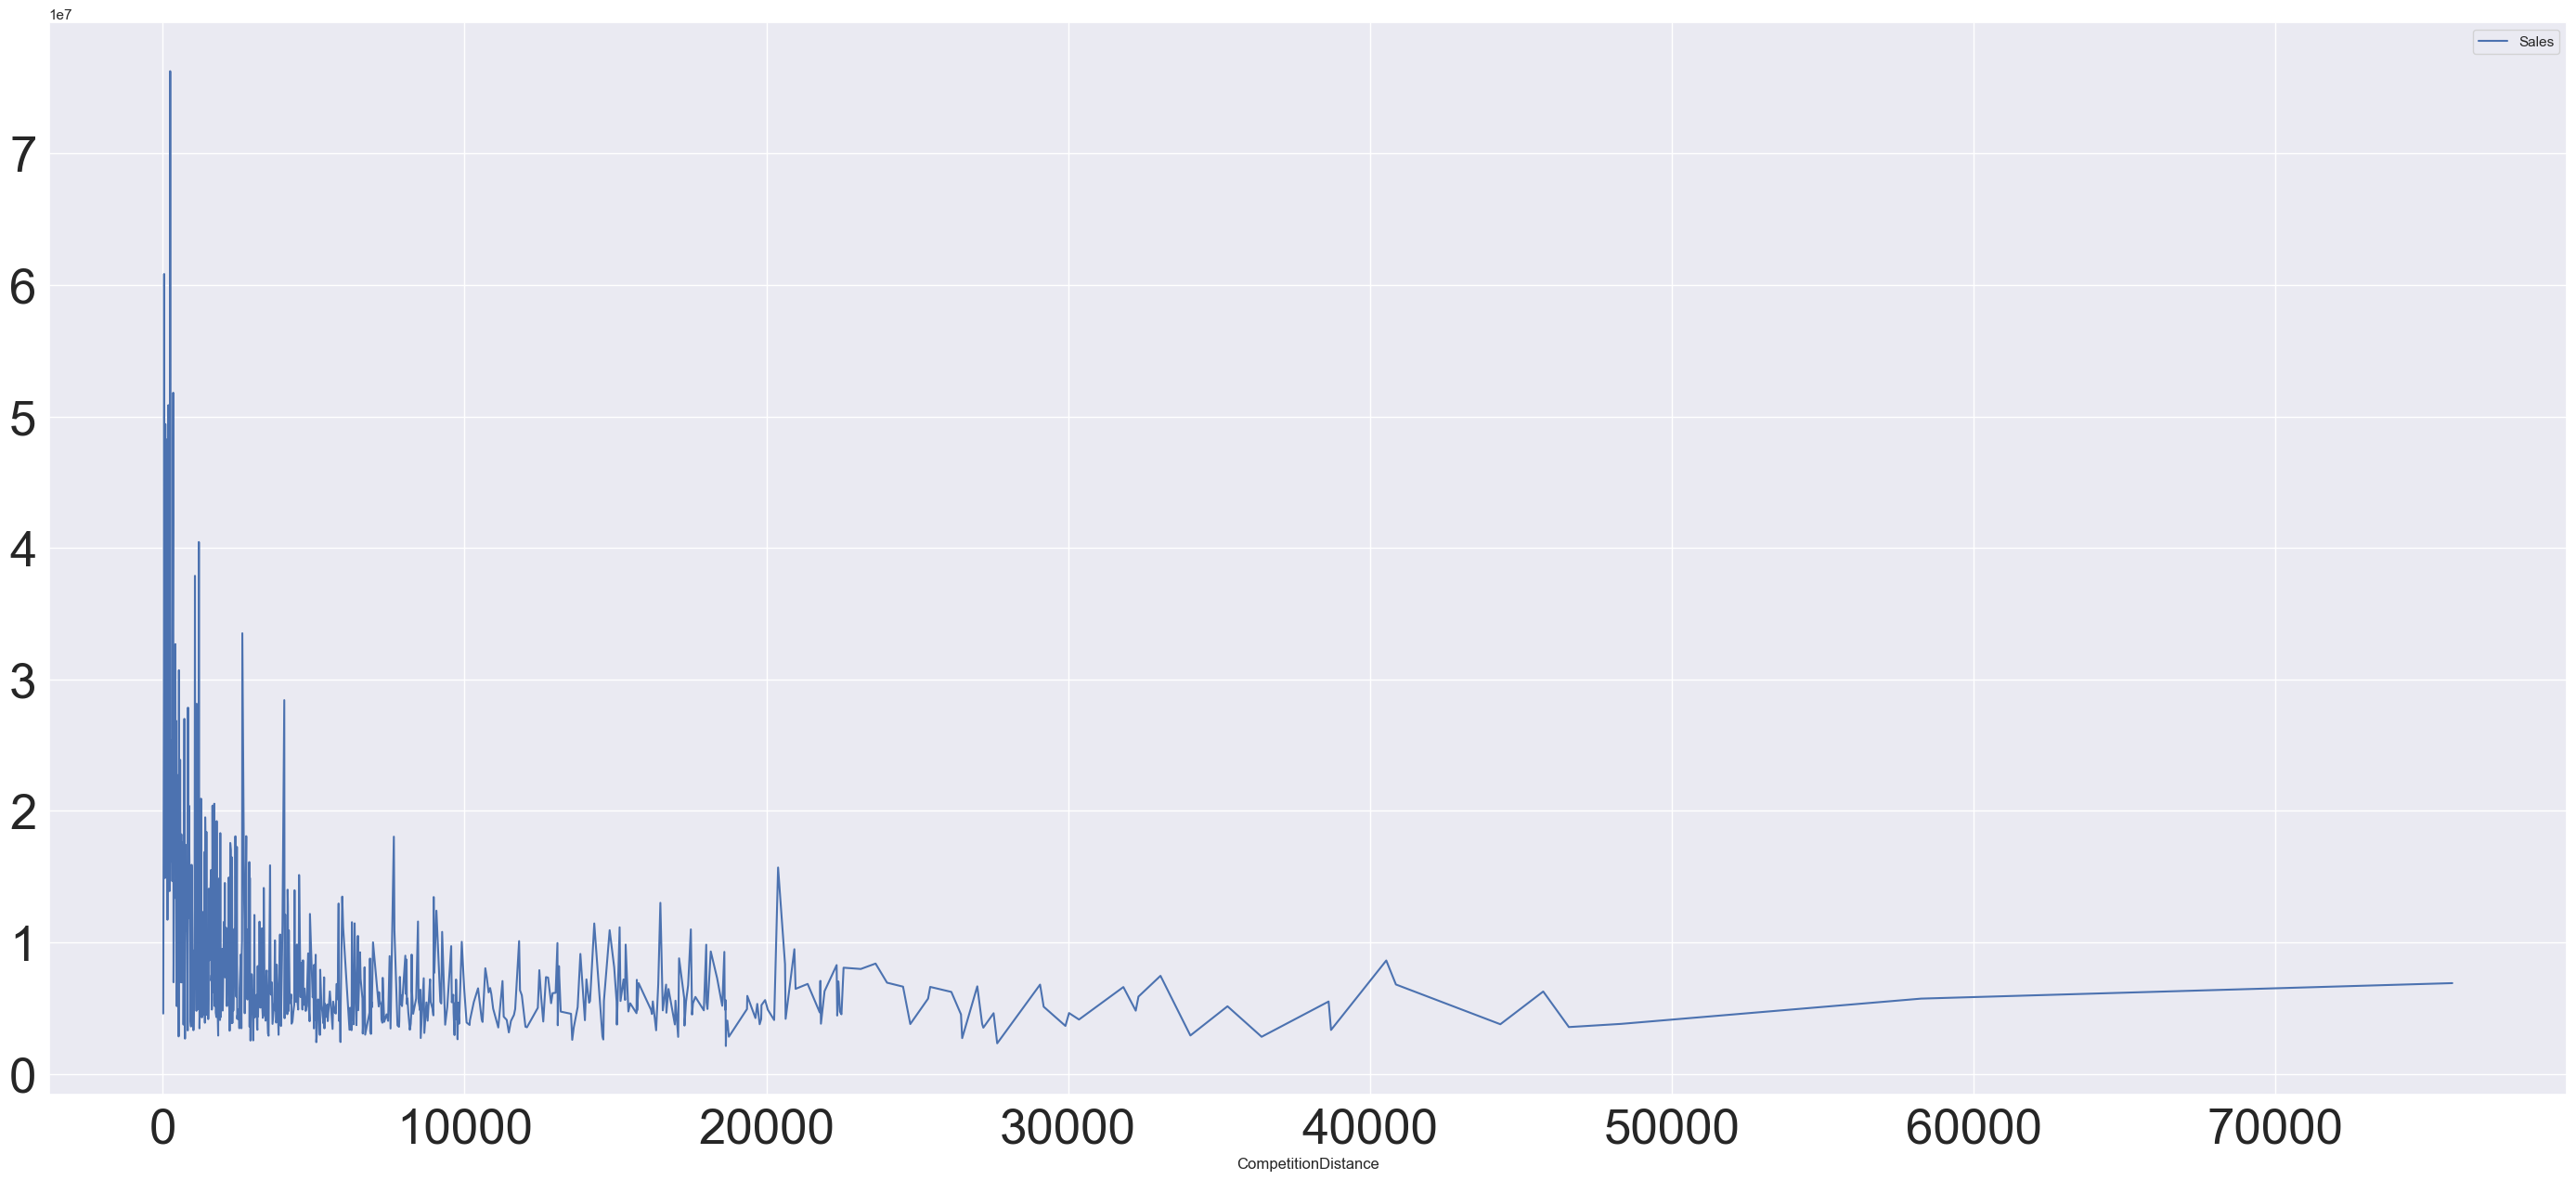

In [71]:
sns.set(font_scale=1)  

distance_data.plot(figsize=(35,15), fontsize=38)
plt.show()

Note: I couldn't believe happens but the less the competition distance the more the sales and asthe competion distance 
      increases the sales decreases.

# 10.How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance.




cleaning the data

In [72]:
def convert_cat_date_datetime(dataset, col_name):
    dataset[col_name] = pd.to_datetime[dataset[col_name]]
    return dataset


In [73]:

train_data['Date'] = pd.to_datetime(train_data.Date)

In [74]:
train_data.index = train_data['Date']

In [75]:
# data extraction
train_data['Year'] = train_data.index.year

train_data['Month'] = train_data.index.month

train_data['Day'] = train_data.index.day

train_data['WeekOfYear'] = train_data.index.weekofyear

# adding new variable
train_data['SalePerCustomer'] = train_data['Sales']/train_data['Customers']

train_data['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [76]:
# closed stores

train_data[(train_data.Open == 0) & (train_data.Sales == 0)].head()

Store DayOfWeek       Date  Sales  Customers Open Promo  \
Date                                                                  
2015-07-31    292         5 2015-07-31      0          0    0     1   
2015-07-31    876         5 2015-07-31      0          0    0     1   
2015-07-30    292         4 2015-07-30      0          0    0     1   
2015-07-30    876         4 2015-07-30      0          0    0     1   
2015-07-29    292         3 2015-07-29      0          0    0     1   

           StateHoliday SchoolHoliday  Year  Month  Day  WeekOfYear  \
Date                                                                  
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-30            o             1  2015      7   30          31   
2015-07-30            o             1  2015      7   30          31   
2015-07-29            o             1  2015      7   29          31   

            SalePerCustomer  
Date                         
2015-07-31              NaN  
2015-07-31              NaN  
2015-07-30              NaN  
2015-07-30              NaN  
2015-07-29              NaN

In [77]:
# opened stores with zero sales

zero_sales = train_data[(train_data.Open != 0) & (train_data.Sales == 0)]

print("In total: ", zero_sales.shape)

zero_sales.head(5)

In total:  (54, 14)


Store DayOfWeek       Date  Sales  Customers Open Promo  \
Date                                                                  
2015-05-15    971         5 2015-05-15      0          0    1     0   
2015-03-26    674         4 2015-03-26      0          0    1     0   
2015-05-02    699         4 2015-05-02      0          0    1     1   
2014-01-10    708         3 2014-01-10      0          0    1     1   
2014-09-22    357         1 2014-09-22      0          0    1     0   

           StateHoliday SchoolHoliday  Year  Month  Day  WeekOfYear  \
Date                                                                  
2015-05-15            o             1  2015      5   15          20   
2015-03-26            o             0  2015      3   26          13   
2015-05-02            o             0  2015      5    2          18   
2014-01-10            o             0  2014      1   10           2   
2014-09-22            o             0  2014      9   22          39   

            SalePerCustomer  
Date                         
2015-05-15              NaN  
2015-03-26              NaN  
2015-05-02              NaN  
2014-01-10              NaN  
2014-09-22              NaN

In [78]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")

train_data = train_data[(train_data["Open"] != 0) & (train_data['Sales'] != 0)]

print("In total: ", train_data.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 14)


In [79]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We have few variables with missing values that we need to deal with. Let's start with the CompetitionDistance.

In [80]:
# missing values in CompetitionDistance

store_data[pd.isnull(store_data.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear Promo2  \
290                       NaN                       NaN      0   
621                       NaN                       NaN      0   
878                       NaN                       NaN      1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

Note: Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a
    complete sense to replace NaN with the median values (which is twice less that the average).

In [81]:
# fill NaN with a median value (skewed distribuion)

store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

If there's no Promo2 then there's no information about it. We can replace these values by zeros. The same goes
for tha variables deducted from the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [82]:
# replace NA's by 0

store_data.fillna(0, inplace = True)

In [83]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 

# that are present in both train and store sets are merged together

train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)

train_store.head()

Joining train set with an additional store information.
In total:  (844338, 23)


Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0      1         5 2015-07-31   5263        555    1     1            o   
1      1         4 2015-07-30   5020        546    1     1            o   
2      1         3 2015-07-29   4782        523    1     1            o   
3      1         2 2015-07-28   5011        560    1     1            o   
4      1         1 2015-07-27   6102        612    1     1            o   

  SchoolHoliday  Year  ...  SalePerCustomer  StoreType  Assortment  \
0             1  2015  ...         9.482883          c           a   
1             1  2015  ...         9.194139          c           a   
2             1  2015  ...         9.143403          c           a   
3             1  2015  ...         8.948214          c           a   
4             1  2015  ...         9.970588          c           a   

   CompetitionDistance CompetitionOpenSinceMonth CompetitionOpenSinceYear  \
0               1270.0                       9.0                   2008.0   
1               1270.0                       9.0                   2008.0   
2               1270.0                       9.0                   2008.0   
3               1270.0                       9.0                   2008.0   
4               1270.0                       9.0                   2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 23 columns]

In [84]:
train_store.groupby('StoreType')['Sales'].describe()

count          mean          std     min      25%     50%  \
StoreType                                                                 
a          457042.0   6925.697986  3277.351589    46.0  4695.25  6285.0   
b           15560.0  10233.380141  5155.729868  1252.0  6345.75  9130.0   
c          112968.0   6933.126425  2896.958579   133.0  4916.00  6408.0   
d          258768.0   6822.300064  2556.401455   538.0  5050.00  6395.0   

                75%      max  
StoreType                     
a           8406.00  41551.0  
b          13184.25  38722.0  
c           8349.25  31448.0  
d           8123.25  38037.0

StoreType B has the highest average of Sales among all others, however we have much less data for it.
So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:

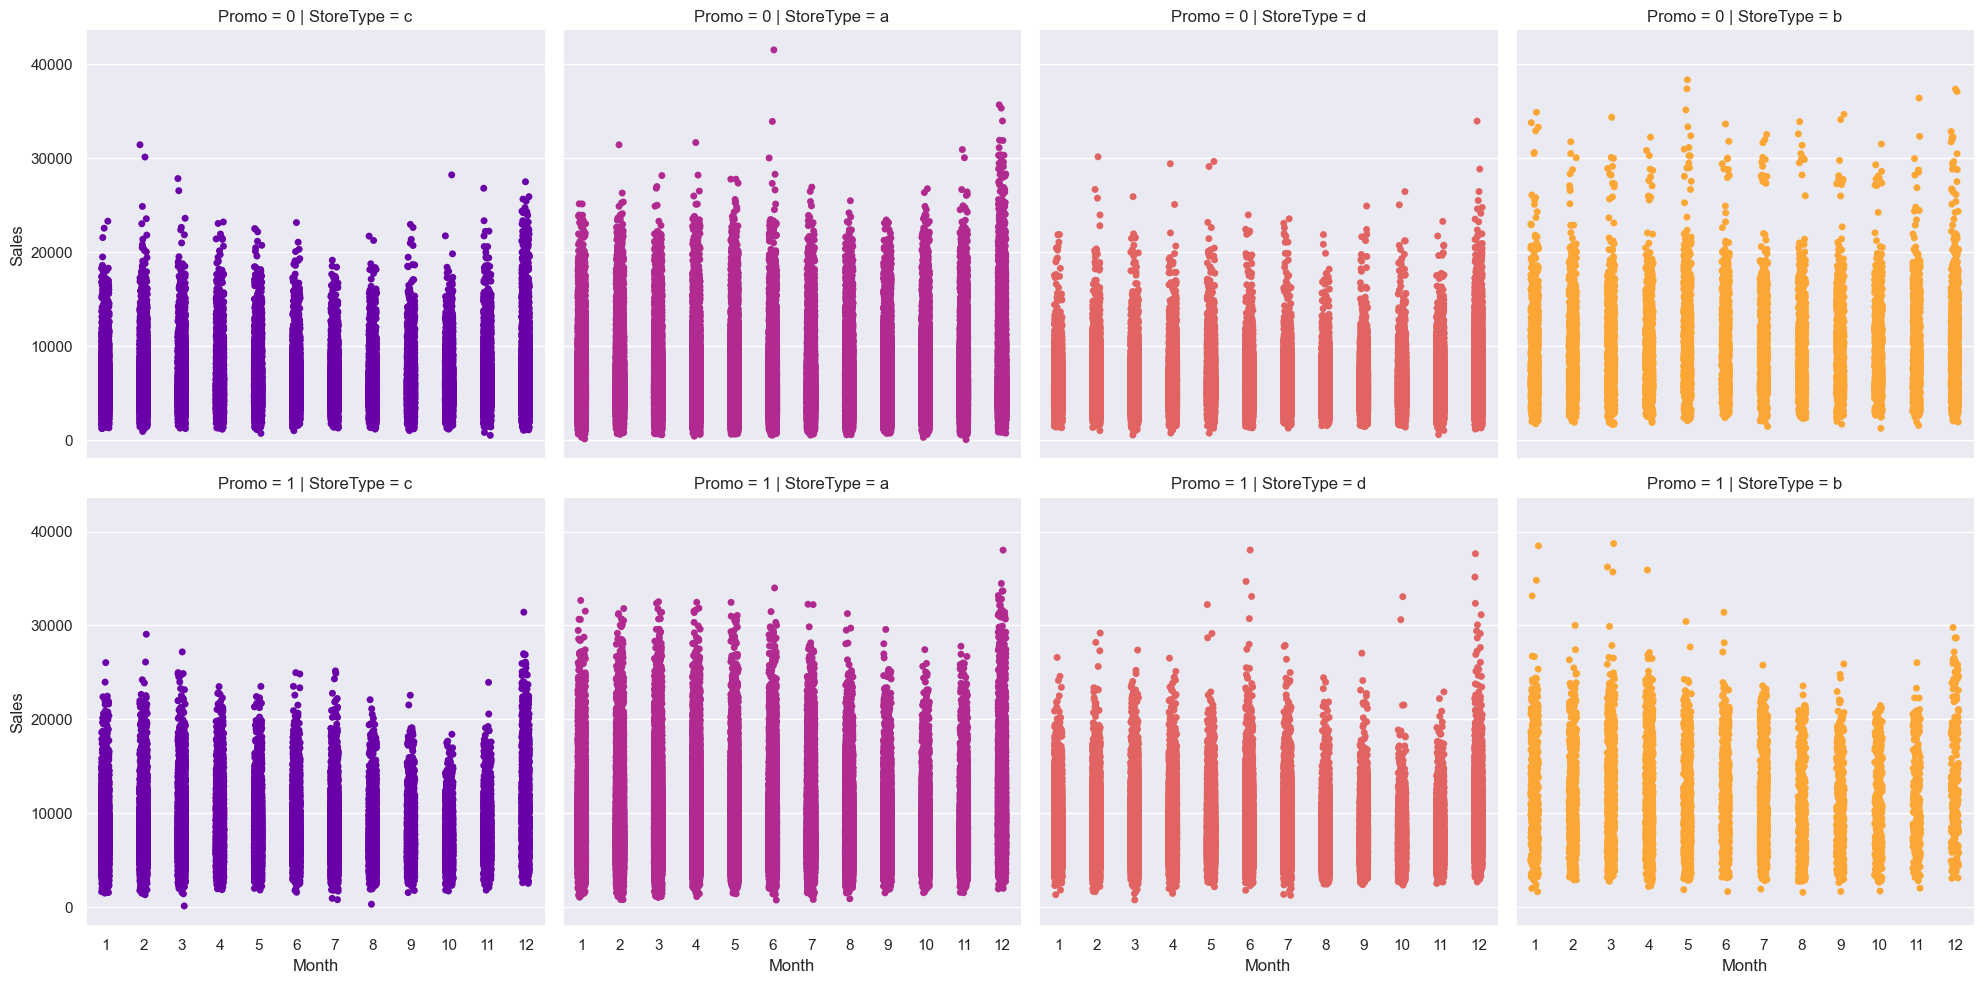

In [85]:
sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows
                

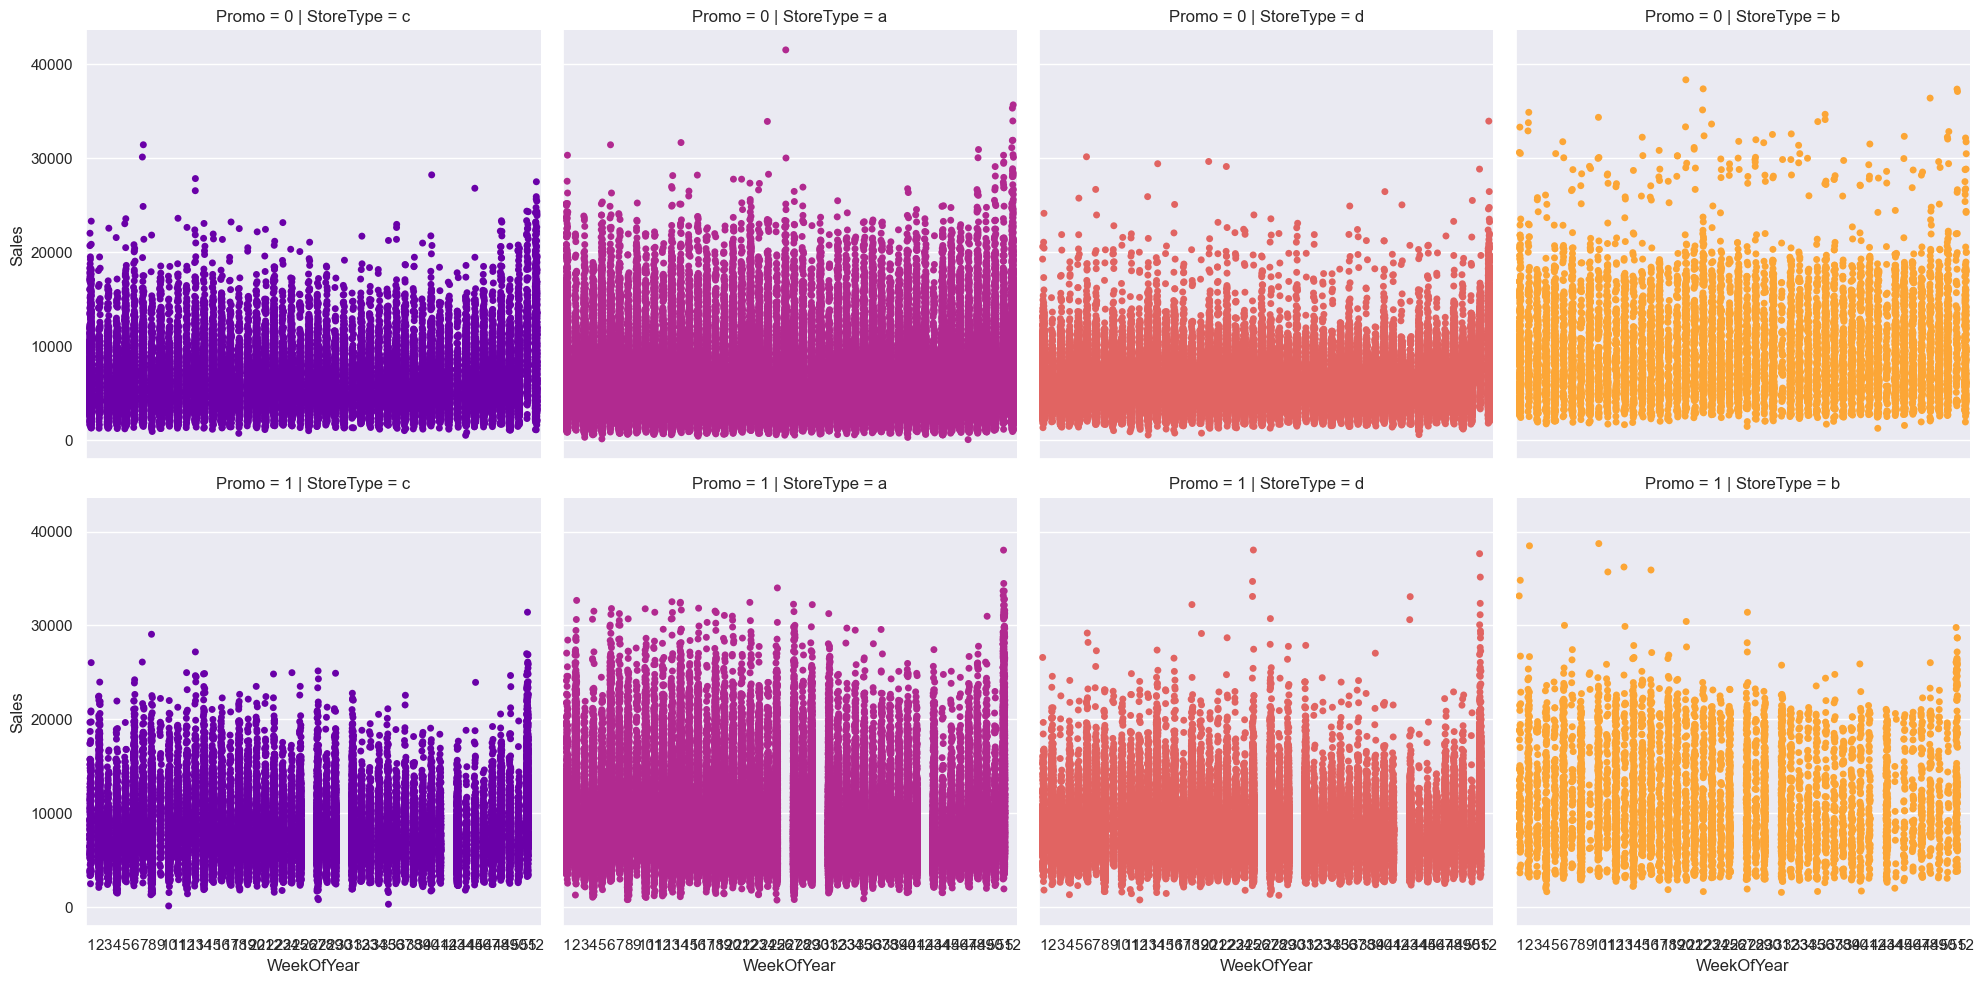

In [86]:
# sales trends

sns.catplot(data = train_store, x = 'WeekOfYear', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows
                

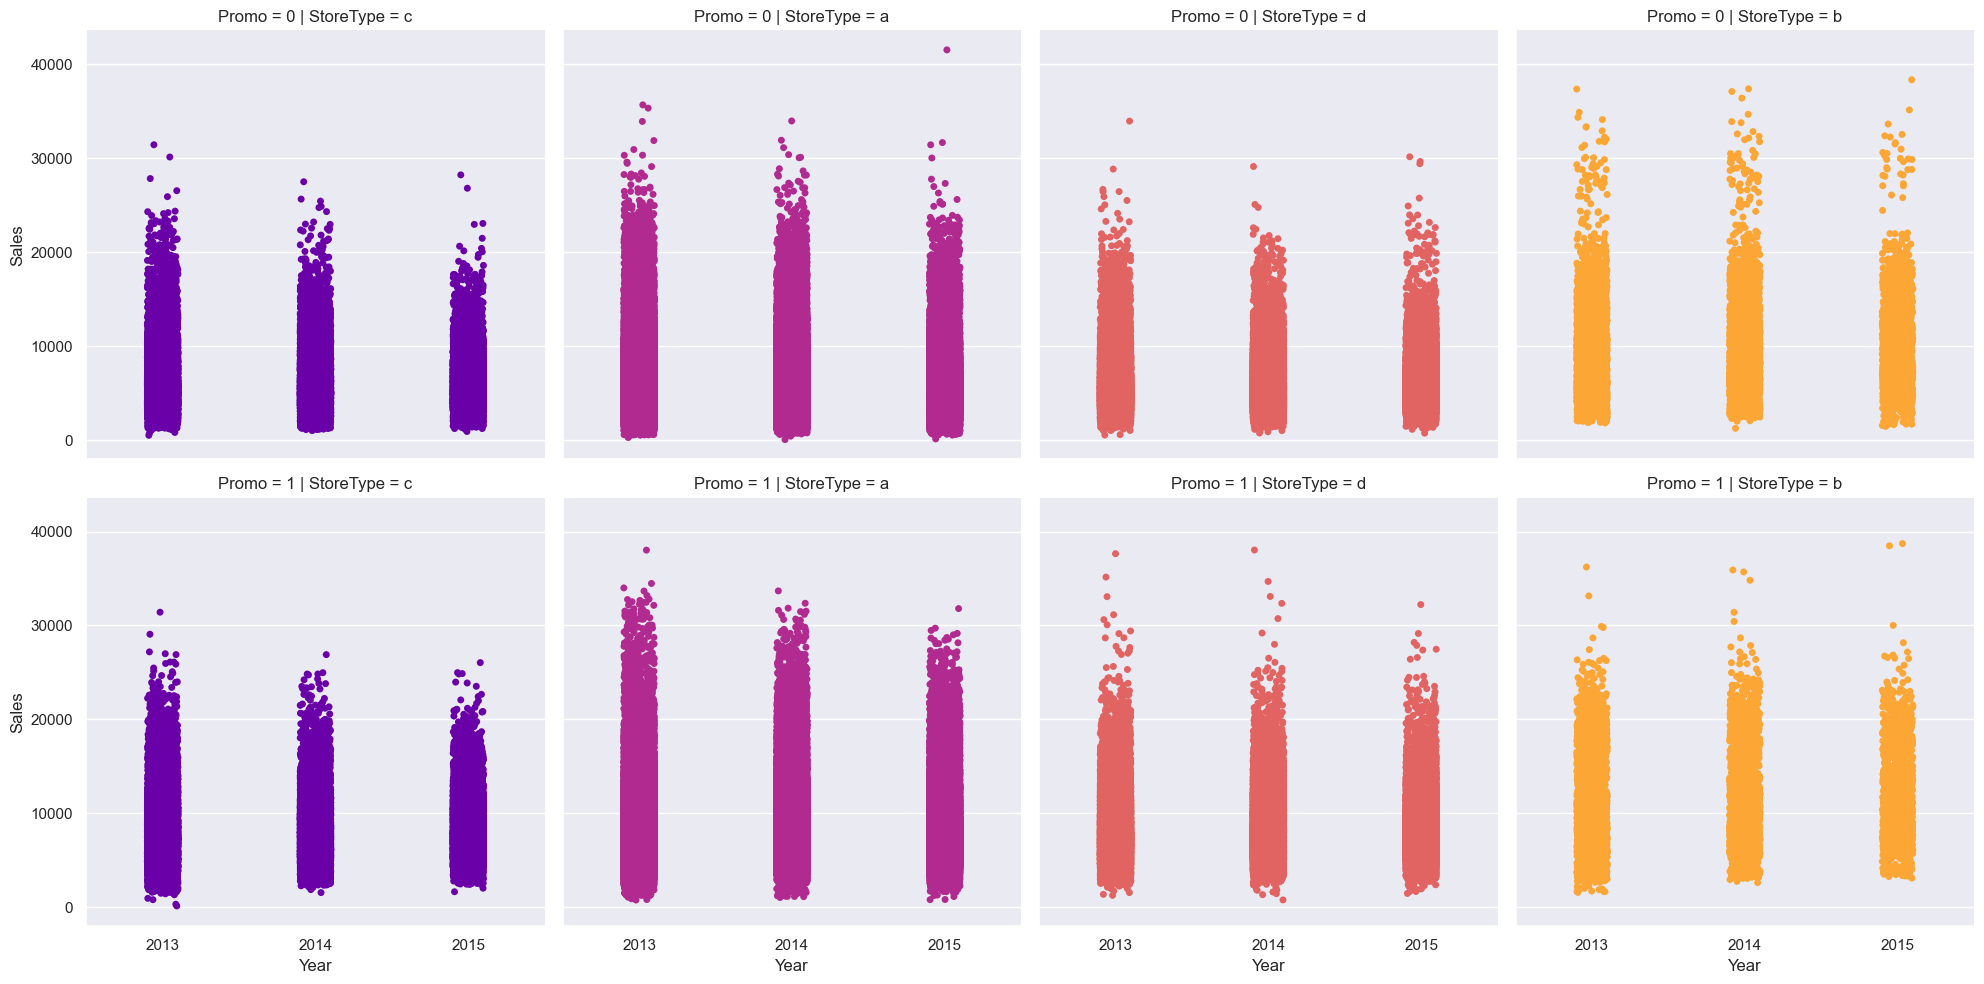

In [87]:
# sales trends

sns.catplot(data = train_store, x = 'Year', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') # per promo in the store in rows
                

In [88]:
train_data.isnull().sum()

Store              0
DayOfWeek          0
Date               0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
SalePerCustomer    0
dtype: int64

In [89]:
test_data['Open']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
41083    1.0
41084    1.0
41085    1.0
41086    1.0
41087    1.0
Name: Open, Length: 41088, dtype: object

Note: As we see from the above datasets we can have more than 30% null value in respective columns in store data

from this we can decide what we should do with the null values.

Detecting an outliers

An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.

We Use scipy.stats.zscore() to remove outliers from a DataFrame

In [91]:
train_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo  \
Date                                                                  
2015-07-31      1         5 2015-07-31   5263        555    1     1   
2015-07-31      2         5 2015-07-31   6064        625    1     1   
2015-07-31      3         5 2015-07-31   8314        821    1     1   
2015-07-31      4         5 2015-07-31  13995       1498    1     1   
2015-07-31      5         5 2015-07-31   4822        559    1     1   

           StateHoliday SchoolHoliday  Year  Month  Day  WeekOfYear  \
Date                                                                  
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   

            SalePerCustomer  
Date                         
2015-07-31         9.482883  
2015-07-31         9.702400  
2015-07-31        10.126675  
2015-07-31         9.342457  
2015-07-31         8.626118

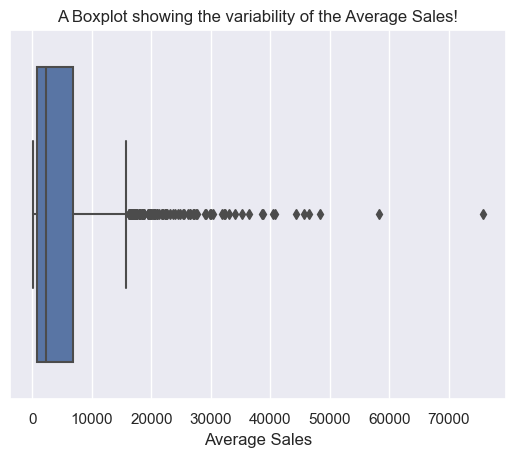

In [92]:
sns.boxplot(x=store_data['CompetitionDistance'])

plt.title('A Boxplot showing the variability of the Average Sales!')

plt.xlabel('Average Sales')

plt.show()

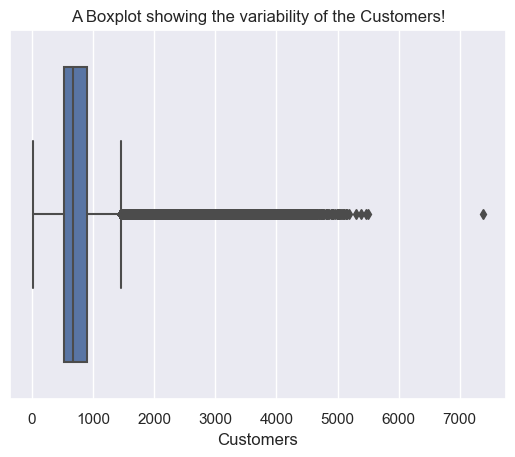

In [93]:
sns.boxplot(x=train_data['Customers'])

plt.title('A Boxplot showing the variability of the Customers!')

plt.xlabel('Customers')

plt.show()

Outlier Treatment


Get the Z-score table.

In [94]:
from scipy import stats 

z_sales=np.abs(stats.zscore(train_data.Sales))

z_sales

Date
2015-07-31    0.545445
2015-07-31    0.287375
2015-07-31    0.437539
2015-07-31    2.267868
2015-07-31    0.687528
                ...   
2013-01-01    1.153729
2013-01-01    1.227213
2013-01-01    0.618903
2013-01-01    0.794171
2013-01-01    0.320560
Name: Sales, Length: 844338, dtype: float64

In [95]:
#cutomer outlier
z_cust=np.abs(stats.zscore(train_data.Customers))
z_cust

Date
2015-07-31    0.517897
2015-07-31    0.343418
2015-07-31    0.145124
2015-07-31    1.832587
2015-07-31    0.507927
                ...   
2013-01-01    0.490479
2013-01-01    4.023548
2013-01-01    1.209447
2013-01-01    0.688502
2013-01-01    1.600779
Name: Customers, Length: 844338, dtype: float64

We find the z-score for each of the data point in the dataset and if the z-score is greater than 3 than we 
can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.

In [96]:
threshold=3
print(np.where(z_cust>3))

(array([   124,    250,    258, ..., 844319, 844323, 844334], dtype=int64),)


let's remove the outlier by using the above infromation

In [97]:
train_data=train_data[(z_cust< 3)]

train_data.head()


Store DayOfWeek       Date  Sales  Customers Open Promo  \
Date                                                                  
2015-07-31      1         5 2015-07-31   5263        555    1     1   
2015-07-31      2         5 2015-07-31   6064        625    1     1   
2015-07-31      3         5 2015-07-31   8314        821    1     1   
2015-07-31      4         5 2015-07-31  13995       1498    1     1   
2015-07-31      5         5 2015-07-31   4822        559    1     1   

           StateHoliday SchoolHoliday  Year  Month  Day  WeekOfYear  \
Date                                                                  
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   

            SalePerCustomer  
Date                         
2015-07-31         9.482883  
2015-07-31         9.702400  
2015-07-31        10.126675  
2015-07-31         9.342457  
2015-07-31         8.626118

In [98]:
train_data.shape

(828819, 14)

In [99]:
### Interquartile Range Method Sales Column

Q1=store_data['CompetitionOpenSinceYear'].quantile(0.25)

Q3=store_data['CompetitionOpenSinceYear'].quantile(0.75)

IQR=Q3-Q1

print(Q1)

print(Q3)

print(IQR)

Lower_Whisker = Q1-1.5*IQR

Upper_Whisker = Q3+1.5*IQR

print(Lower_Whisker, Upper_Whisker)

0.0
2011.0
2011.0
-3016.5 5027.5


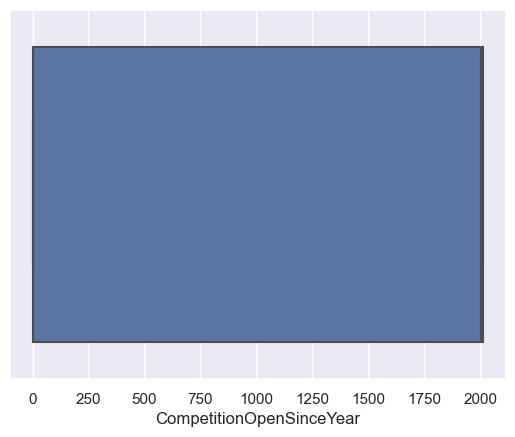

In [100]:
#removing the outliers and plotting again

store_data = store_data[store_data['CompetitionOpenSinceYear'] <Upper_Whisker]

sns.boxplot(x=store_data['CompetitionOpenSinceYear'])

plt.show()


In [101]:
### Interquartile Range Method Sales Column

Q1=train_data['Sales'].quantile(0.25)

Q3=train_data['Sales'].quantile(0.75)

IQR=Q3-Q1

print(Q1)

print(Q3)

print(IQR)

Lower_Whisker = Q1-1.5*IQR

Upper_Whisker = Q3+1.5*IQR

print(Lower_Whisker, Upper_Whisker)

4831.0
8219.0
3388.0
-251.0 13301.0


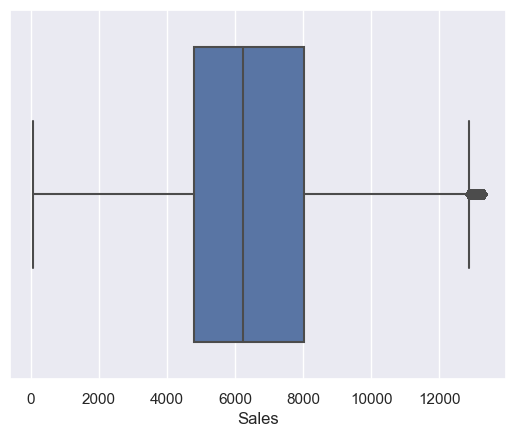

In [102]:
#removing the outliers and plotting again

train_data = train_data[train_data['Sales'] < Upper_Whisker]

sns.boxplot(x=train_data['Sales'])

plt.show()

Closed stores and zero sales stores

In [103]:
len(train_data[(train_data.Open == 0) & (train_data.Sales == 0)])


0

In [104]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
### We have few variables with missing values that we need to deal with. Let's start with the CompetitionDistance.

Relationshiop analysis

In [105]:
#correlation matrix
correlation = train_data.corr()

<Axes: >

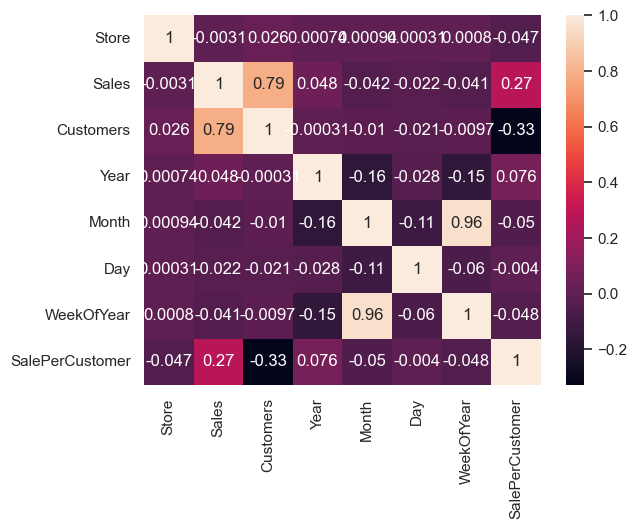

In [106]:
sns.heatmap(correlation,annot =True)

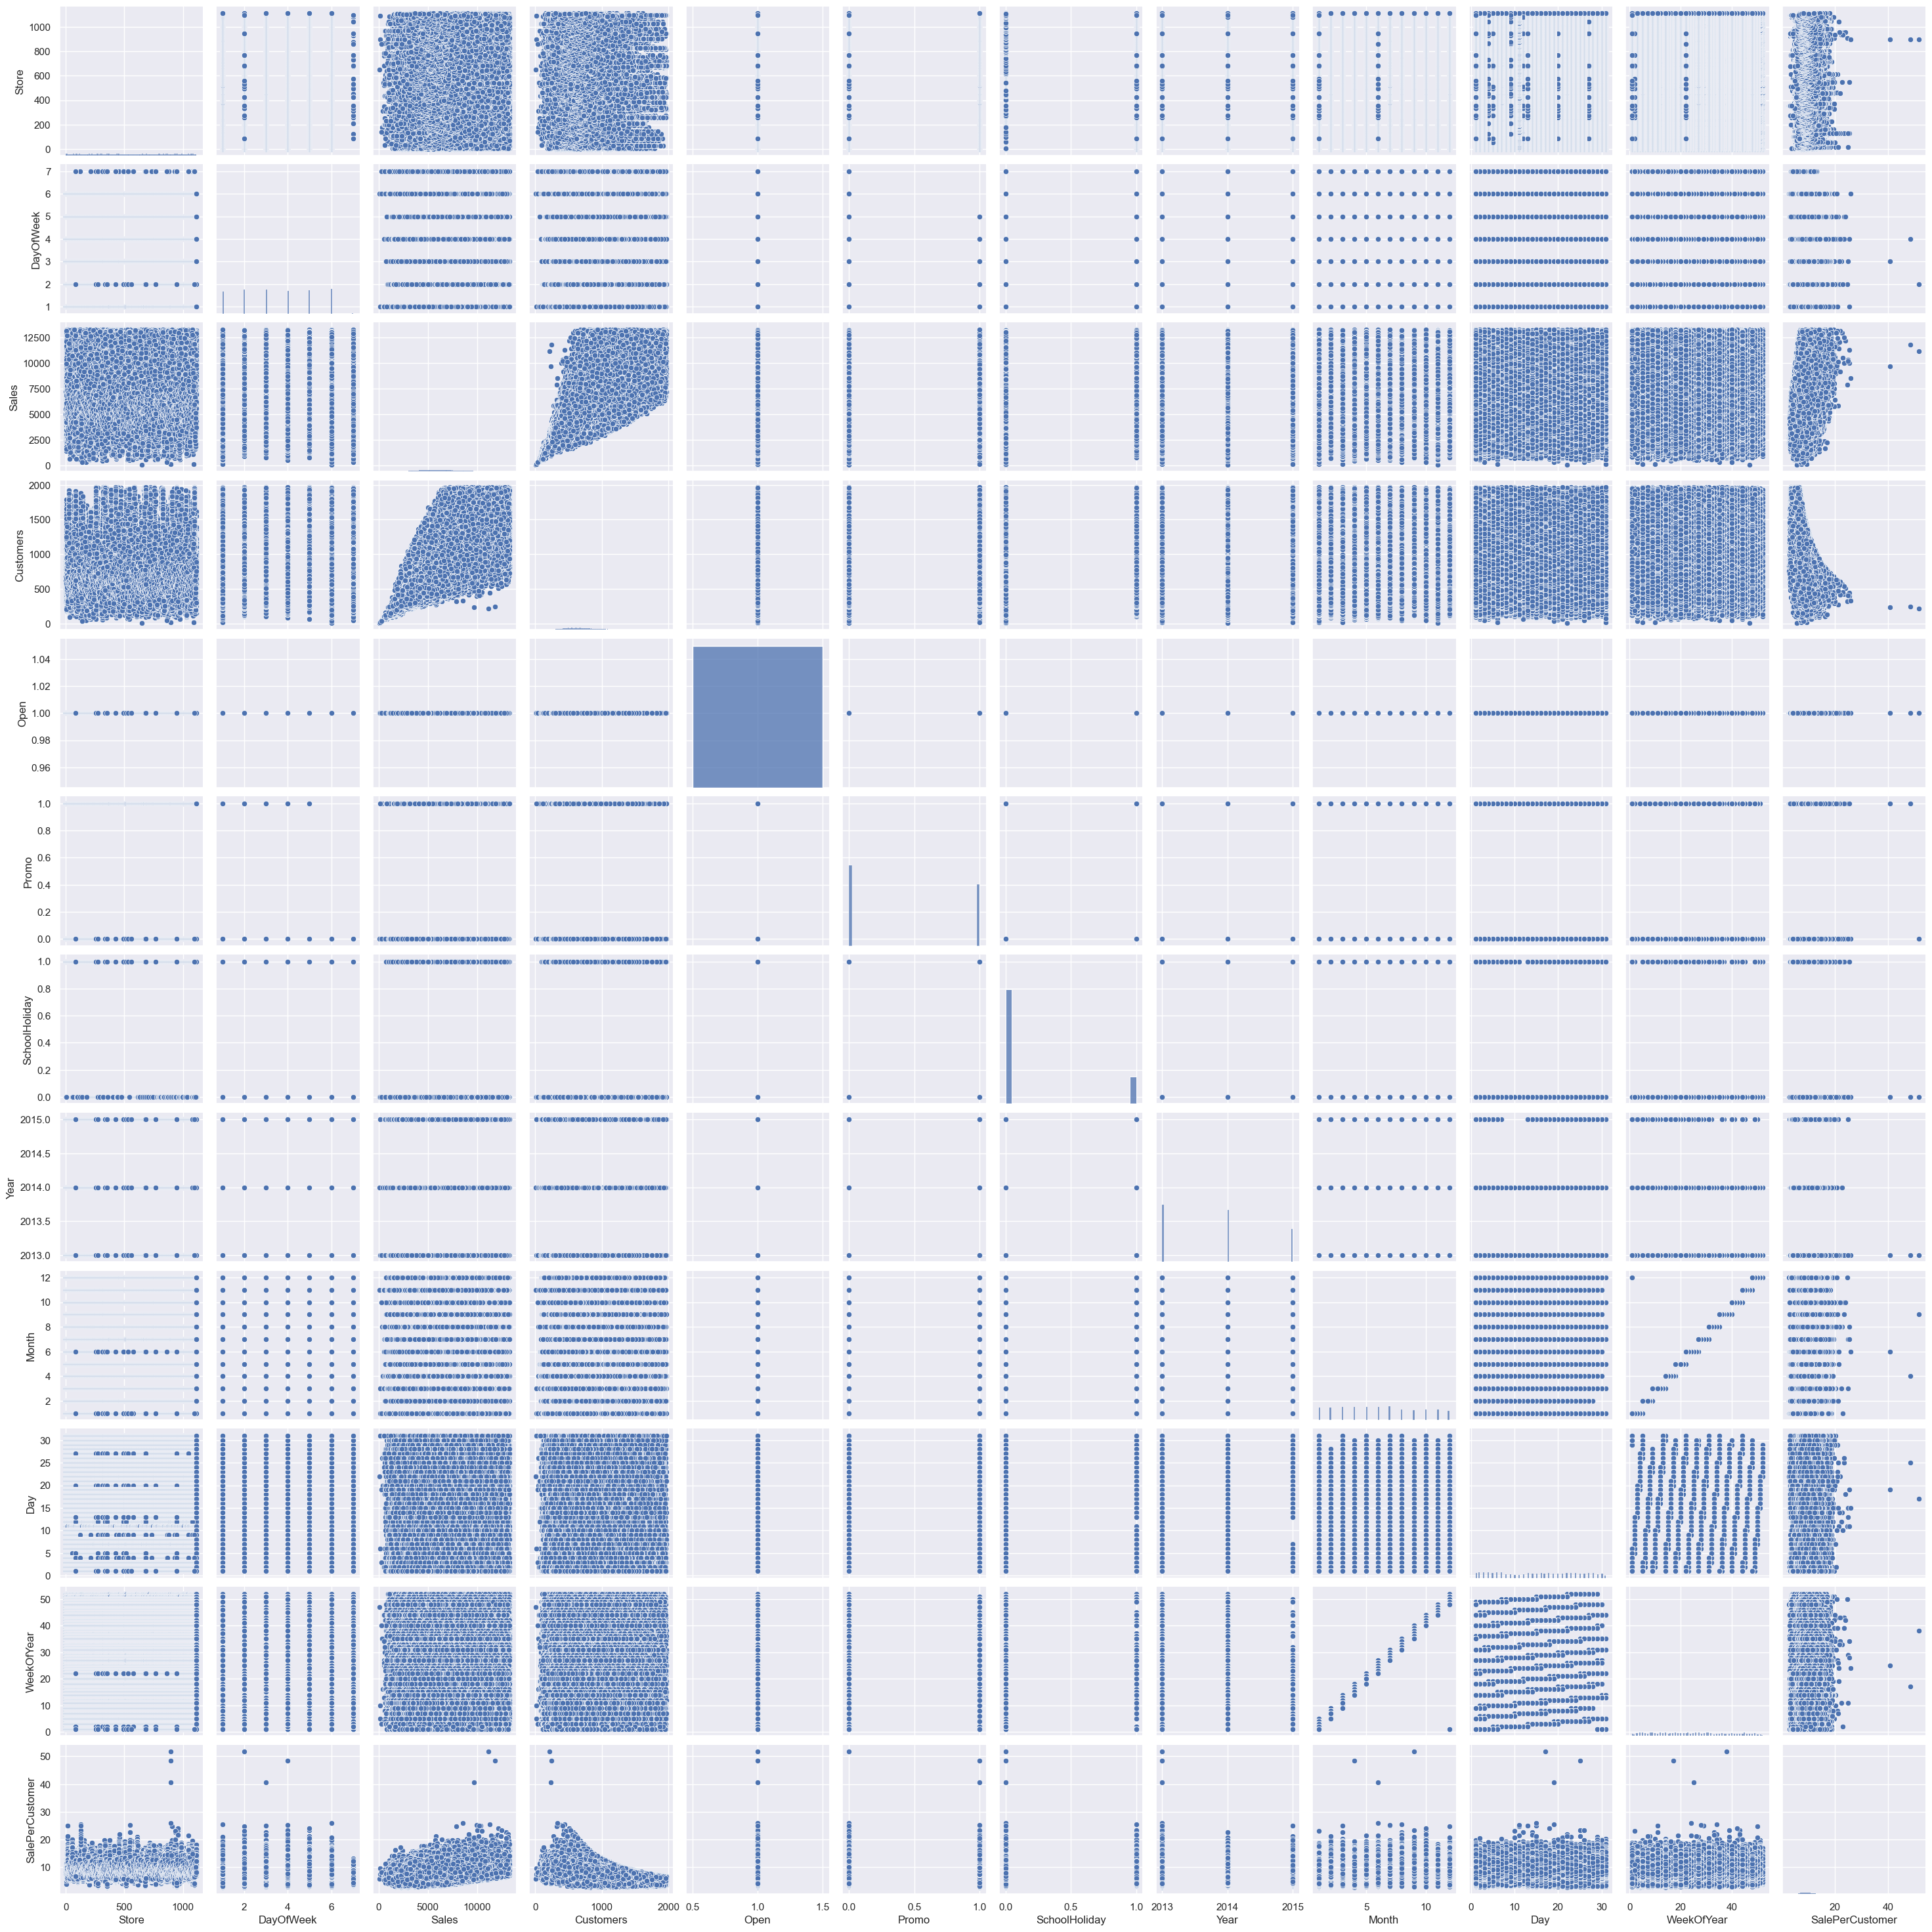

In [110]:
sns.pairplot(train_data)

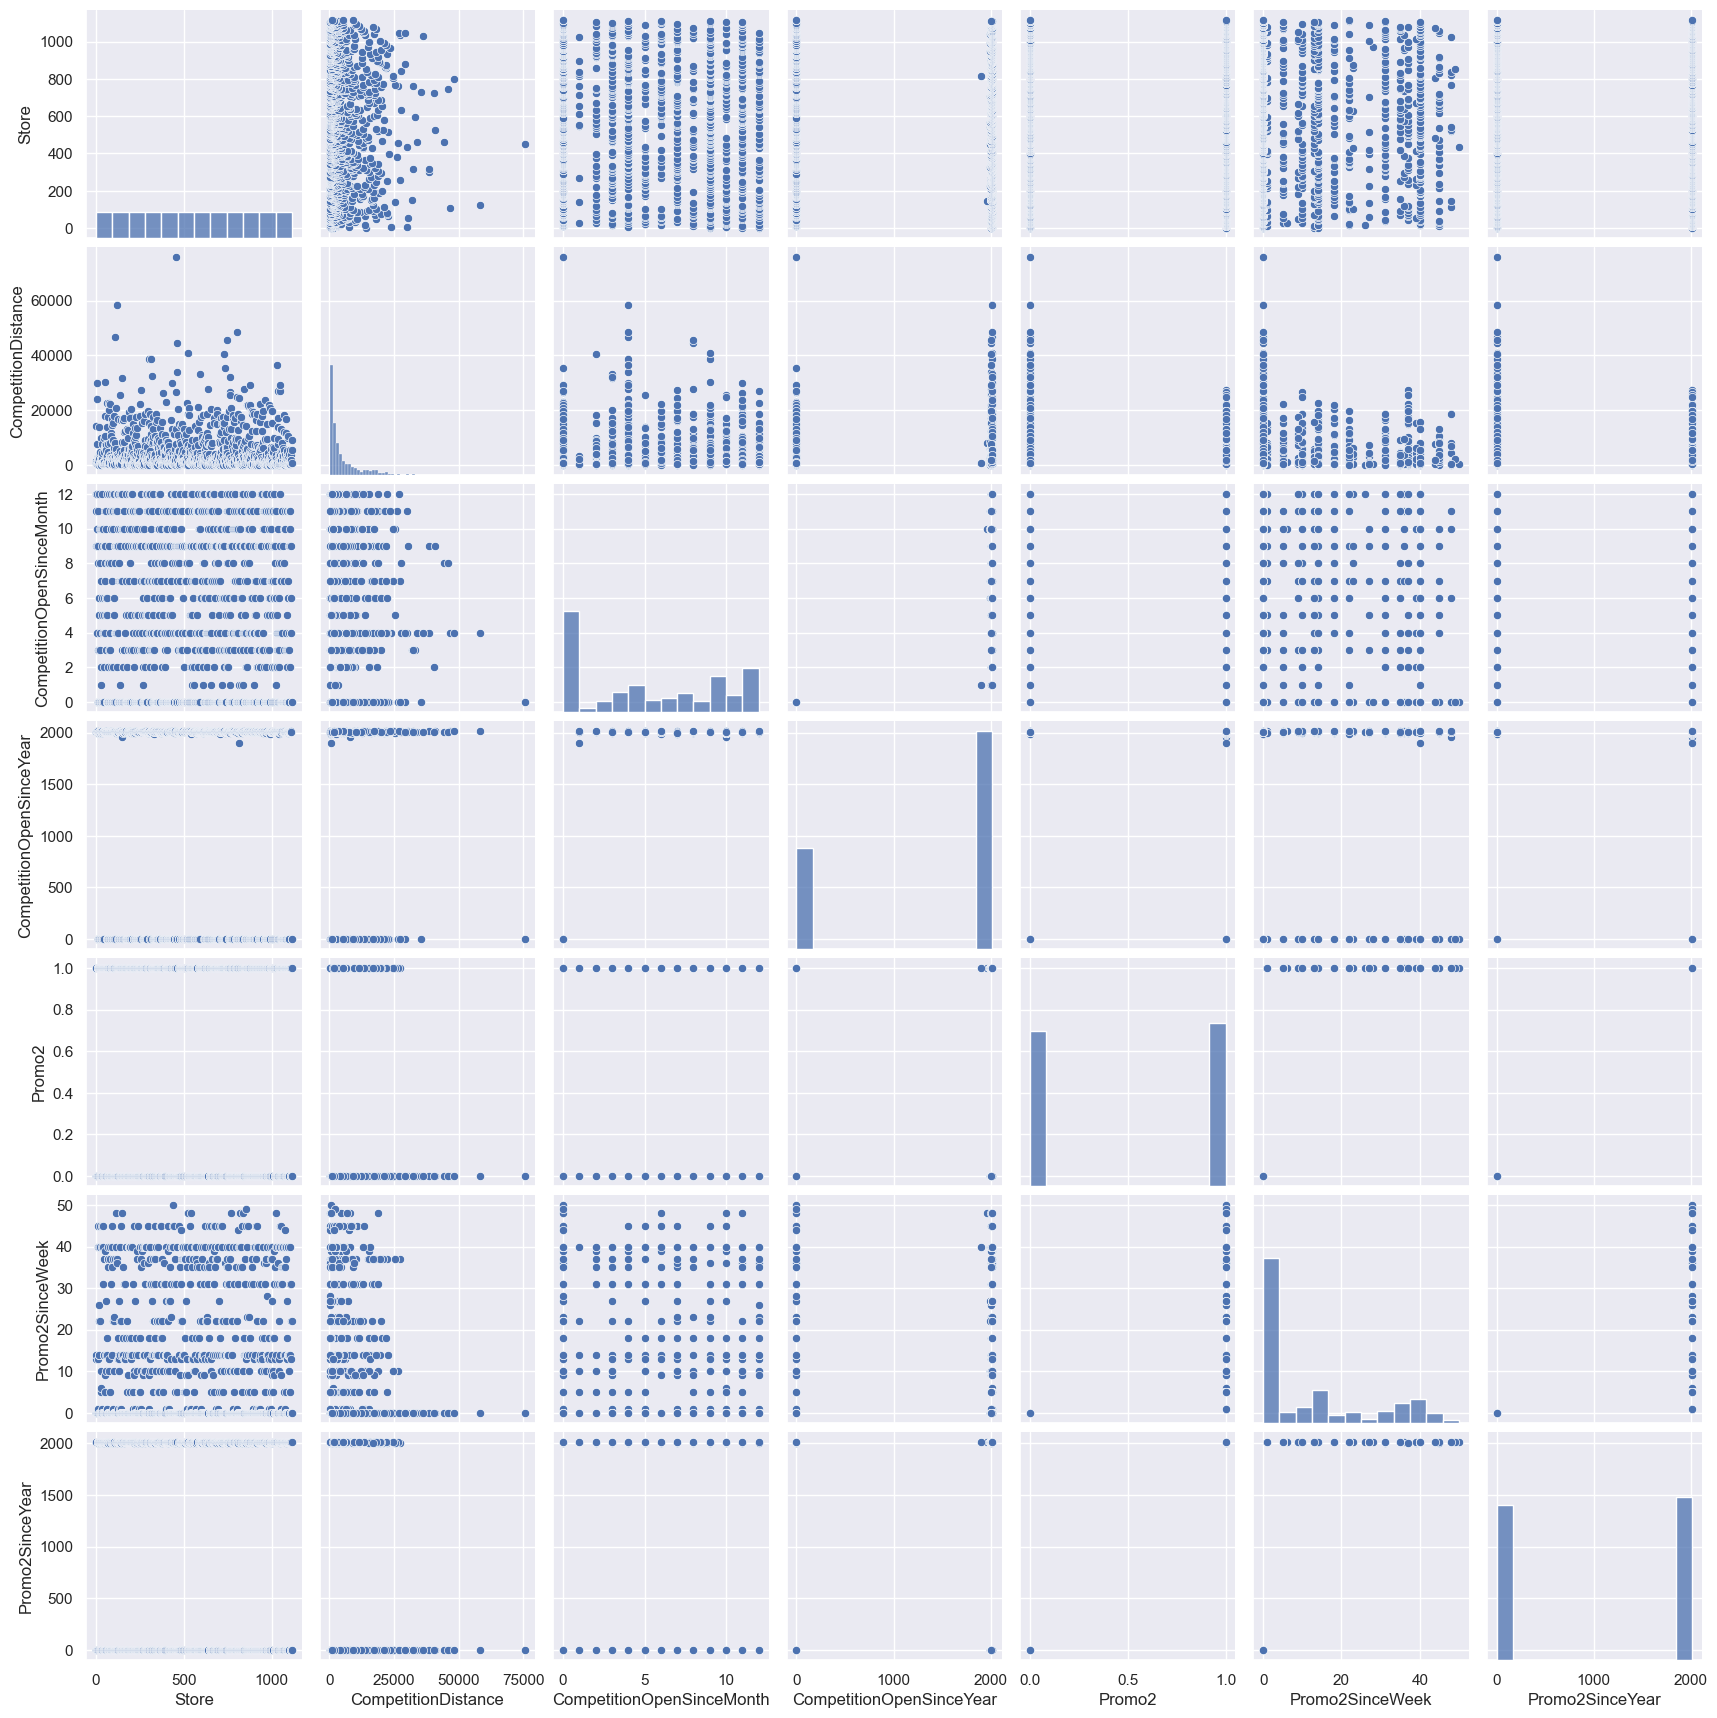

In [108]:
sns.pairplot(store_data)

In [111]:
train_data.head()

Store DayOfWeek       Date  Sales  Customers Open Promo  \
Date                                                                  
2015-07-31      1         5 2015-07-31   5263        555    1     1   
2015-07-31      2         5 2015-07-31   6064        625    1     1   
2015-07-31      3         5 2015-07-31   8314        821    1     1   
2015-07-31      5         5 2015-07-31   4822        559    1     1   
2015-07-31      6         5 2015-07-31   5651        589    1     1   

           StateHoliday SchoolHoliday  Year  Month  Day  WeekOfYear  \
Date                                                                  
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   
2015-07-31            o             1  2015      7   31          31   

            SalePerCustomer  
Date                         
2015-07-31         9.482883  
2015-07-31         9.702400  
2015-07-31        10.126675  
2015-07-31         8.626118  
2015-07-31         9.594228

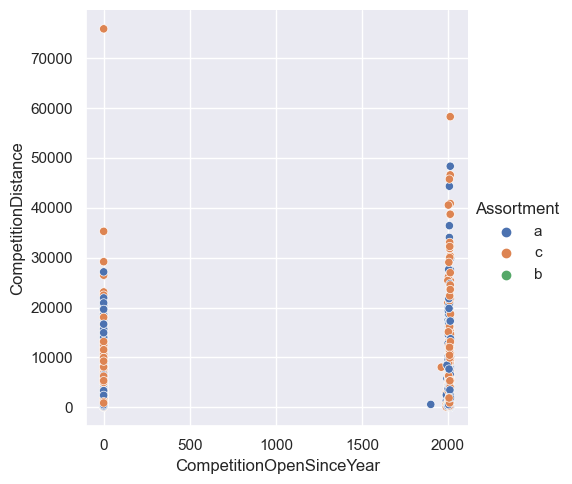

In [112]:
sns.relplot( x="CompetitionOpenSinceYear",y='CompetitionDistance', hue='Assortment', data=store_data)

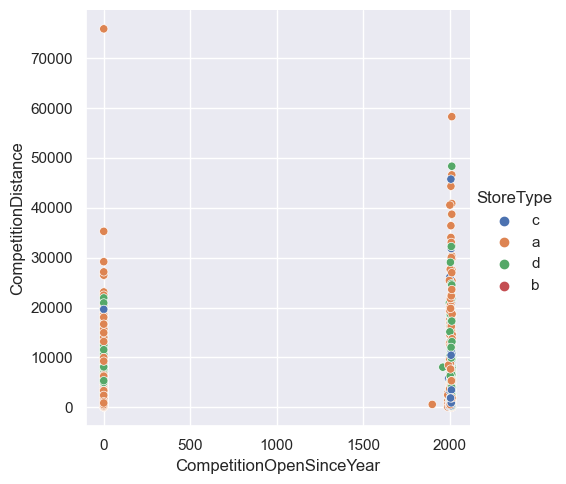

In [113]:
sns.relplot( x="CompetitionOpenSinceYear",y='CompetitionDistance', hue='StoreType', data=store_data)